### Note: needed figures:



# Figures:

From bioRxiv v. 1:
Fig 3C, S4B (Gabs); Fig S6A (Brks)

In [15]:
# import sys

# from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
# import numpy as np
# import pandas as pd
# import copy, time
# import itertools as it

# sys.path.extend(['../../..'])
# from analysis import session
# from sess_util import sess_gen_util, sess_plot_util, sess_file_util, sess_trace_util
# from util import gen_util, plot_util, file_util, math_util

# from matplotlib.backends.backend_pdf import PdfPages
# import matplotlib.colors as mcolors
# import scipy.stats as scist


import numpy as np
import pandas as pd
import sys, copy, time
import itertools as it

sys.path.extend(['../', '../../../'])
import trkd_roi_analysis as tra
import trkd_roi_plotting as trp

from analysis import session
from util import gen_util, plot_util, file_util, math_util

from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [29]:
"""
Initialization
"""

# path to data directory
datadir = '/home/jay/Dropbox/research/yu/dendrites/new-dff-and-data'
# name for mouse_df
mouse_df_fnm = '/home/jay/Dropbox/research/yu/dendrites/' + \
    'eyes/custom-dendrites-aibs-code/OpenScope_CA_Analysis/mouse_df.csv'


# obtain mouse_df and mouse numbers, both full and only those with data for 
#  sessions 1 through 3
mouse_df, mouse_ns_full, mouse_ns_sess_123 = tra.set_up_mouse_info(mouse_df_fnm)

# General parameters for functions
stimtype_list = ['gabors', 'bricks']
brk_dir = 'any'
op = 'd-prime'
scale = True
remnans = False
sess_ns = [1,2,3]

All mice:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
Mice with all of sessions 1-3 : [ 1  3  4  6  7  8  9 10 11 12 13]


In [30]:
# Remove mice 12, 13 for now until get new data up and running
mouse_ns_sess_123 = mouse_ns_sess_123[:-2]
mouse_ns_sess_123

array([ 1,  3,  4,  6,  7,  8,  9, 10, 11])

In [126]:
'''
Create main dataframe.  Extracts calcium data for each ROI into dataframe, organized by
layer, compartment, mouse, and session, and averaged over all sequences in the session.
'''

# t = time.time()
# only_matched_rois = False
# mouse_ns = mouse_ns_full

gab_all_mn_dff_df, brk_all_mn_dff_df = \
    make_session_averaged_df(mouse_df, mouse_df_fnm, mouse_ns_full, sess_ns, 
                             stimtype_list, only_matched_rois=False)

# pd.DataFrame(columns = ['mouse_n', 'sess_n', 'layer', 
#                                             'compartment', 
#                                             'stimtype', 'num_rois',
#                                             'expec_a', 'expec_b', 'expec_c', 'expec_d',
#                                             'expec_g',
#                                             'unexp_a', 'unexp_b', 'unexp_c', 'unexp_u',
#                                             'unexp_g'])

# brk_all_mn_dff_df = pd.DataFrame(columns = ['mouse_n', 'sess_n', 'layer', 
#                                             'compartment', 
#                                             'stimtype', 'num_rois',
#                                             'brk_expec', 'brk_unexp'])

# # Loop over stimuli, mice, and sessions
# for stimtype in stimtype_list:
#     for mouse_n in mouse_ns:
#         if mouse_n > 1:
#             print('\n\n')
#         for sess_n in sess_ns:
#             # Account for different mice's missing sessions
#             if not np.isin(sess_n, 
#                            mouse_df[mouse_df['mouse_n']==mouse_n]['sess_n'].values):
#                 print('nope for mouse ', mouse_n, ', sess ', sess_n)
#                 continue
#             print('\nMouse ', mouse_n, '  Session', sess_n)
#             if stimtype=='gabors':
#                 gab_all_mn_dff_df = \
#                     make_session_averaged_df(gab_all_mn_dff_df, mouse_df, mouse_df_fnm,
#                                              mouse_n, sess_n, stimtype, 
#                                              only_matched_rois)
#             elif stimtype=='bricks':
#                 brk_all_mn_dff_df = \
#                     make_session_averaged_df(brk_all_mn_dff_df, mouse_df, mouse_df_fnm,
#                                              mouse_n, sess_n, stimtype,
#                                              only_matched_rois)
#             print( '{:.3f} sec'.format(time.time() - t) )        
            
# print( '{:.3f} sec'.format(time.time() - t) )


Stimulus: gabors

Mouse  1   Session 1

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_408021/ophys_session_758519303
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for gabors
Number of ROIs: 96

Mouse  1   Session 2

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_408021/ophys_session_759189643
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for gabors
Number of ROIs: 74

Mouse  1   Session 3

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_408021/ophys_session_759660390
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for gabors
Number of ROIs: 107



nope for mouse  2 , sess  1
nope for mouse  2 , sess  2
nope for mouse  2 , sess  3




Mouse  3   Session 1

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_411424/ophys_session_761624763
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for gabors
Number of ROIs: 87

Mouse  3   Session 2

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_411424/ophys_session_761944562
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for gabors
Number of ROIs: 90

Mouse  3   Session 3

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_411424/ophys_session_762250376
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for gabors
Number of ROIs: 80




Mouse  4   Session 1

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_411771/ophys_session_760260459
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for gabors
Number of ROIs: 90

Mouse  4   Session 2

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_411771/ophys_session_760659782
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for gabors
Number of ROIs: 70

Mouse  4   Session 3

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_411771/ophys_session_761269197
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for gabors
Number of ROIs: 79



nope for mouse  5 , sess  1
nope for mouse  5 , sess  2
nope for mouse  5 , sess  3




Mouse  6   Session 1

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_413663/ophys_session_764704289
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for gabors
Number of ROIs: 628

Mouse  6   Session 2

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_413663/ophys_session_765193831
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for gabors
Number of ROIs: 348

Mouse  6   Session 3

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_413663/ophys_session_766502238
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for gabors
Number of ROIs: 512




Mouse  7   Session 1

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_418779/ophys_session_777496949
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for gabors
Number of ROIs: 15

Mouse  7   Session 2

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_418779/ophys_session_778374308
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for gabors
Number of ROIs: 26

Mouse  7   Session 3

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_418779/ophys_session_779152062
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for gabors
Number of ROIs: 29




Mouse  8   Session 1

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_420011/ophys_session_777914830
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for gabors
Number of ROIs: 205

Mouse  8   Session 2

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_420011/ophys_session_778864809
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for gabors
Number of ROIs: 159

Mouse  8   Session 3

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_420011/ophys_session_779650018
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for gabors
Number of ROIs: 182




Mouse  9   Session 1

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433414/ophys_session_826187862
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for gabors
Number of ROIs: 727

Mouse  9   Session 2

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433414/ophys_session_826773996
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for gabors
Number of ROIs: 300

Mouse  9   Session 3

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433414/ophys_session_827833392
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for gabors
Number of ROIs: 333




Mouse  10   Session 1

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433448/ophys_session_826338612
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for gabors
Number of ROIs: 1636

Mouse  10   Session 2

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433448/ophys_session_826819032
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for gabors
Number of ROIs: 445

Mouse  10   Session 3

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433448/ophys_session_828816509
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for gabors
Number of ROIs: 496




Mouse  11   Session 1

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433451/ophys_session_823453391
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for gabors
Number of ROIs: 966

Mouse  11   Session 2

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433451/ophys_session_824434038
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for gabors
Number of ROIs: 1029

Mouse  11   Session 3

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433451/ophys_session_825180479
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for gabors
Number of ROIs: 986




Mouse  12   Session 1

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433458/ophys_session_826659257
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for gabors
Number of ROIs: 99

Mouse  12   Session 2

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433458/ophys_session_827300090
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for gabors
Number of ROIs: 87

Mouse  12   Session 3

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433458/ophys_session_828475005
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for gabors
Number of ROIs: 97




Mouse  13   Session 1

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_440889/ophys_session_832883243
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for gabors
Number of ROIs: 224

Mouse  13   Session 2

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_440889/ophys_session_833704570
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for gabors
Number of ROIs: 224

Mouse  13   Session 3

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_440889/ophys_session_834403597
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for gabors
Number of ROIs: 210
1420.097 sec


Stimulus: bricks

Mouse  1   Session 1

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_408021/ophys_session_758519303
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for bricks
pre, post =  0 1
Number of ROIs: 96
pre, post =  0 1

Mouse  1   Session 2

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_408021/ophys_session_759189643
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for bricks
pre, post =  0 1
Number of ROIs: 74
pre, post =  0 1

Mouse  1   Session 3

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_408021/ophys_session_759660390
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for bricks
pre, post =  0 1
Number of ROIs: 107
pre, post =  0 1



nope for mouse  2 , sess  1
nope for mouse  2 , sess  2
nope for mouse  2 , sess  3




Mouse  3   Session 1

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_411424/ophys_session_761624763
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for bricks
pre, post =  0 1
Number of ROIs: 87
pre, post =  0 1

Mouse  3   Session 2

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_411424/ophys_session_761944562
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for bricks
pre, post =  0 1
Number of ROIs: 90
pre, post =  0 1

Mouse  3   Session 3

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_411424/ophys_session_762250376
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for bricks
pre, post =  0 1
Number of ROIs: 80
pre, post =  0 1




Mouse  4   Session 1

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_411771/ophys_session_760260459
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for bricks
pre, post =  0 1
Number of ROIs: 90
pre, post =  0 1

Mouse  4   Session 2

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_411771/ophys_session_760659782
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for bricks
pre, post =  0 1
Number of ROIs: 70
pre, post =  0 1

Mouse  4   Session 3

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_411771/ophys_session_761269197
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for bricks
pre, post =  0 1
Number of ROIs: 79
pre, post =  0 1



nope for mouse  5 , sess  1
nope for mouse  5 , sess  2
nope for mouse  5 , sess  3




Mouse  6   Session 1

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_413663/ophys_session_764704289
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for bricks
pre, post =  0 1
Number of ROIs: 628
pre, post =  0 1

Mouse  6   Session 2

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_413663/ophys_session_765193831
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for bricks
pre, post =  0 1
Number of ROIs: 348
pre, post =  0 1

Mouse  6   Session 3

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_413663/ophys_session_766502238
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for bricks
pre, post =  0 1
Number of ROIs: 512
pre, post =  0 1




Mouse  7   Session 1

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_418779/ophys_session_777496949
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for bricks
pre, post =  0 1
Number of ROIs: 15
pre, post =  0 1

Mouse  7   Session 2

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_418779/ophys_session_778374308
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for bricks
pre, post =  0 1
Number of ROIs: 26
pre, post =  0 1

Mouse  7   Session 3

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_418779/ophys_session_779152062
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for bricks
pre, post =  0 1
Number of ROIs: 29
pre, post =  0 1




Mouse  8   Session 1

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_420011/ophys_session_777914830
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for bricks
pre, post =  0 1
Number of ROIs: 205
pre, post =  0 1

Mouse  8   Session 2

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_420011/ophys_session_778864809
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for bricks
pre, post =  0 1
Number of ROIs: 159
pre, post =  0 1

Mouse  8   Session 3

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_420011/ophys_session_779650018
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for bricks
pre, post =  0 1
Number of ROIs: 182
pre, post =  0 1




Mouse  9   Session 1

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433414/ophys_session_826187862
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for bricks
pre, post =  0 1
Number of ROIs: 727
pre, post =  0 1

Mouse  9   Session 2

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433414/ophys_session_826773996
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for bricks
pre, post =  0 1
Number of ROIs: 300
pre, post =  0 1

Mouse  9   Session 3

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433414/ophys_session_827833392
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for bricks
pre, post =  0 1
Number of ROIs: 333
pre, post =  0 1




Mouse  10   Session 1

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433448/ophys_session_826338612
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for bricks
pre, post =  0 1
Number of ROIs: 1636
pre, post =  0 1

Mouse  10   Session 2

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433448/ophys_session_826819032
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for bricks
pre, post =  0 1
Number of ROIs: 445
pre, post =  0 1

Mouse  10   Session 3

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433448/ophys_session_828816509
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for bricks
pre, post =  0 1
Number of ROIs: 496
pre, post =  0 1




Mouse  11   Session 1

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433451/ophys_session_823453391
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for bricks
pre, post =  0 1
Number of ROIs: 966
pre, post =  0 1

Mouse  11   Session 2

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433451/ophys_session_824434038
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for bricks
pre, post =  0 1
Number of ROIs: 1029
pre, post =  0 1

Mouse  11   Session 3

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433451/ophys_session_825180479
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for bricks
pre, post =  0 1
Number of ROIs: 986
pre, post =  0 1




Mouse  12   Session 1

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433458/ophys_session_826659257
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for bricks
pre, post =  0 1
Number of ROIs: 99
pre, post =  0 1

Mouse  12   Session 2

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433458/ophys_session_827300090
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for bricks
pre, post =  0 1
Number of ROIs: 87
pre, post =  0 1

Mouse  12   Session 3

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433458/ophys_session_828475005
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for bricks
pre, post =  0 1
Number of ROIs: 97
pre, post =  0 1




Mouse  13   Session 1

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_440889/ophys_session_832883243
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for bricks
pre, post =  0 1
Number of ROIs: 224
pre, post =  0 1

Mouse  13   Session 2

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_440889/ophys_session_833704570
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for bricks
pre, post =  0 1
Number of ROIs: 224
pre, post =  0 1

Mouse  13   Session 3

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_440889/ophys_session_834403597
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


Getting data for bricks
pre, post =  0 1
Number of ROIs: 210
pre, post =  0 1
2166.968 sec



In [123]:
# del gab_all_mn_dff_df, brk_all_mn_dff_df

In [107]:
gab_all_mn_dff_df__orig = copy.deepcopy(gab_all_mn_dff_df)
brk_all_mn_dff_df__orig = copy.deepcopy(brk_all_mn_dff_df)

In [109]:
display(gab_all_mn_dff_df__orig.head())
display(brk_all_mn_dff_df__orig.head())

,mouse_n,sess_n,layer,compartment,stimtype,num_rois,expec_a,expec_b,expec_c,expec_d,expec_g,unexp_a,unexp_b,unexp_c,unexp_u,unexp_g
0,1,1,L2/3,soma,gabors,96,"[0.0007797357039686224, 0.0003157541568212676,...","[0.00839578243941919, 0.000875232059655657, 0....","[0.009494554358535832, -0.0006114021441319651,...","[0.00928209947174772, 0.0003465001640936825, 0...","[0.0005445811266053298, 0.0008867252287811092,...","[0.003989425972845159, 0.00014095113302470724,...","[0.006449515001763054, 0.0003325356470341034, ...","[0.0054140946343678295, -0.0010698266007447873...","[0.01992963906276692, 0.001513499804696826, 0....","[0.028281730400950965, 0.0012262712682389305, ..."
1,1,2,L2/3,soma,gabors,74,"[6.750610006276842e-06, 0.03997477031729884, -...","[0.0009588618948521662, 0.03714803917288779, 0...","[0.0022707413045818903, 0.02655050945086615, 0...","[0.0042759921339860125, 0.01915869161199936, 0...","[0.0005513101362998428, 0.03372042648176702, -...","[0.0005969177497224348, 0.014705424670874172, ...","[0.0026997476256313485, 0.023665935076166454, ...","[0.0016137849873124061, 0.025617478298451537, ...","[1.9973165311415513e-05, 0.018858306956355025,...","[-0.00012927327668647766, 0.010233137613145376..."
2,1,3,L2/3,soma,gabors,107,"[0.00814665540571359, 0.016870769205682673, 0....","[0.033908725593264716, 0.00867062963720171, 0....","[0.036285472580519416, 0.010572914244798812, 0...","[0.01633481882543974, 0.017750083652812713, 0....","[0.008438769498529333, 0.029214699018613833, -...","[0.016099405963162252, 0.02070732399220911, 0....","[0.03194948066308527, 0.006864455664277807, 0....","[0.03517159290640316, 0.005916309434622677, -0...","[0.032281287042043486, 0.015540899066407052, 0...","[0.03713830079828953, 0.023843524143973917, 0...."
3,3,1,L2/3,soma,gabors,87,"[0.014575258408417802, -0.0039495711691347165,...","[0.028180429474648112, -0.0007450755063033214,...","[0.008674244009938634, 0.00469992027039648, 0....","[0.03819239216722028, 0.0038813670883286614, 0...","[0.016202607309309017, 0.005139173611683798, 0...","[0.017276808174037386, -0.0009940085170805889,...","[0.033719519786898175, 0.0021415390859285737, ...","[0.00458511320818836, 0.003303379003775027, 0....","[0.03734048519091056, -0.0020063388285495296, ...","[0.025272570407308053, -0.0005347647750891447,..."
4,3,2,L2/3,soma,gabors,90,"[-0.00035212958908225153, -0.00075614929677020...","[0.005948457839343393, 0.0015178284337621652, ...","[0.007702212533832861, 0.0021524050638962702, ...","[0.0013295894151985756, 0.0010864102011625197,...","[-0.0022803942501056383, 0.0007374027187825481...","[0.0002832595620285413, 0.0006488710108551411,...","[0.005793520251685886, 0.0019480908689381428, ...","[0.007211260661793462, 0.000959265518330598, 0...","[0.0013965607540830417, 0.0020714774768986104,...","[-0.00213200484283189, 0.00232298271070035, -0..."


,mouse_n,sess_n,layer,compartment,stimtype,num_rois,brk_expec,brk_unexp
0,1,1,L2/3,soma,bricks,96,"[0.04461264600167702, 0.0028587207256436245, 0...","[0.04604283069143065, 0.0030999817525911677, 0..."
1,1,2,L2/3,soma,bricks,74,"[0.00203066723494862, 0.0032554826595593456, 0...","[0.0019258899136495788, 0.0031774263644678436,..."
2,1,3,L2/3,soma,bricks,107,"[0.09395557586529174, 0.03622151977790904, 0.0...","[0.08130462119469566, 0.06738143505908227, 0.0..."
3,3,1,L2/3,soma,bricks,87,"[0.015595252772048518, 0.038293312934614174, 0...","[0.008434132480776669, 0.0705531907560186, 0.1..."
4,3,2,L2/3,soma,bricks,90,"[0.009870737640183242, 0.10559137511113267, 0....","[0.03562444093863293, 0.09615298065896499, 0.0..."


In [14]:
'''
Create main dataframe.  Extracts calcium data for each ROI into dataframe, organized by
layer, compartment, mouse, and session, and averaged over all sequences in the session.
'''

t = time.time()

# declarations/initializations
gab_all_mn_dff_df = pd.DataFrame(columns = ['mouse_n', 'sess_n', 'layer', 
                                            'compartment', 
                                            'stimtype', 'num_rois',
                                            'expec_a', 'expec_b', 'expec_c', 'expec_d',
                                            'expec_g',
                                            'unexp_a', 'unexp_b', 'unexp_c', 'unexp_u',
                                            'unexp_g'])

brk_all_mn_dff_df = pd.DataFrame(columns = ['mouse_n', 'sess_n', 'layer', 
                                            'compartment', 
                                            'stimtype', 'num_rois',
                                            'brk_expec', 'brk_unexp'])
only_matched_rois = False
mouse_ns = mouse_ns_full

# Loop over stimuli, mice, and sessions
for stimtype in stimtype_list:
    for mouse_n in mouse_ns:
        if mouse_n > 1:
            print('\n\n')
        for sess_n in sess_ns:
            # Account for different mice's missing sessions
            if not np.isin(sess_n, 
                           mouse_df[mouse_df['mouse_n']==mouse_n]['sess_n'].values):
                print('nope for mouse ', mouse_n, ', sess ', sess_n)
                continue
            print('\nMouse ', mouse_n, '  Session', sess_n)
            if stimtype=='gabors':
                gab_all_mn_dff_df = \
                    make_mn_dff_df(gab_all_mn_dff_df, mouse_df, mouse_df_fnm, mouse_n, 
                                   sess_n, stimtype, only_matched_rois)
            elif stimtype=='bricks':
                brk_all_mn_dff_df = \
                    make_mn_dff_df(brk_all_mn_dff_df, mouse_df, mouse_df_fnm, mouse_n, 
                                   sess_n, stimtype, only_matched_rois)
            print( '{:.3f} sec'.format(time.time() - t) )        
            
print( '{:.3f} sec'.format(time.time() - t) )


Mouse  1   Session 1

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_408021/ophys_session_758519303
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


A
dff_data.shape (96,)
dff_data.shape (96,)
B
dff_data.shape (96,)
dff_data.shape (96,)
C
dff_data.shape (96,)
dff_data.shape (96,)
D/U
dff_data.shape (96,)
dff_data.shape (96,)
G
dff_data.shape (96,)
dff_data.shape (96,)
20.799 sec

Mouse  1   Session 2

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_408021/ophys_session_759189643
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


A
dff_data.shape (74,)
dff_data.shape (74,)
B
dff_data.shape (74,)
dff_data.shape (74,)
C
dff_data.shape (74,)
dff_data.shape (74,)
D/U
dff_data.shape (74,)
dff_data.shape (74,)
G
dff_data.shape (74,)
dff_data.shape (74,)
39.499 sec

Mouse  1   Session 3

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_408021/ophys_session_759660390
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


A
dff_data.shape (107,)
dff_data.shape (107,)
B
dff_data.shape (107,)
dff_data.shape (107,)
C
dff_data.shape (107,)
dff_data.shape (107,)
D/U
dff_data.shape (107,)
dff_data.shape (107,)
G
dff_data.shape (107,)
dff_data.shape (107,)
60.923 sec



nope for mouse  2 , sess  1
nope for mouse  2 , sess  2
nope for mouse  2 , sess  3




Mouse  3   Session 1

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_411424/ophys_session_761624763
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


A
dff_data.shape (87,)
dff_data.shape (87,)
B
dff_data.shape (87,)
dff_data.shape (87,)
C
dff_data.shape (87,)
dff_data.shape (87,)
D/U
dff_data.shape (87,)
dff_data.shape (87,)
G
dff_data.shape (87,)
dff_data.shape (87,)
80.185 sec

Mouse  3   Session 2

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_411424/ophys_session_761944562
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


A
dff_data.shape (90,)
dff_data.shape (90,)
B
dff_data.shape (90,)
dff_data.shape (90,)
C
dff_data.shape (90,)
dff_data.shape (90,)
D/U
dff_data.shape (90,)
dff_data.shape (90,)
G
dff_data.shape (90,)
dff_data.shape (90,)
99.343 sec

Mouse  3   Session 3

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_411424/ophys_session_762250376
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


A
dff_data.shape (80,)
dff_data.shape (80,)
B
dff_data.shape (80,)
dff_data.shape (80,)
C
dff_data.shape (80,)
dff_data.shape (80,)
D/U
dff_data.shape (80,)
dff_data.shape (80,)
G
dff_data.shape (80,)
dff_data.shape (80,)
118.395 sec




Mouse  4   Session 1

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_411771/ophys_session_760260459
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


A
dff_data.shape (90,)
dff_data.shape (90,)
B
dff_data.shape (90,)
dff_data.shape (90,)
C
dff_data.shape (90,)
dff_data.shape (90,)
D/U
dff_data.shape (90,)
dff_data.shape (90,)
G
dff_data.shape (90,)
dff_data.shape (90,)
138.147 sec

Mouse  4   Session 2

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_411771/ophys_session_760659782
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


A
dff_data.shape (70,)
dff_data.shape (70,)
B
dff_data.shape (70,)
dff_data.shape (70,)
C
dff_data.shape (70,)
dff_data.shape (70,)
D/U
dff_data.shape (70,)
dff_data.shape (70,)
G
dff_data.shape (70,)
dff_data.shape (70,)
157.435 sec

Mouse  4   Session 3

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_411771/ophys_session_761269197
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


A
dff_data.shape (79,)
dff_data.shape (79,)
B
dff_data.shape (79,)
dff_data.shape (79,)
C
dff_data.shape (79,)
dff_data.shape (79,)
D/U
dff_data.shape (79,)
dff_data.shape (79,)
G
dff_data.shape (79,)
dff_data.shape (79,)
176.172 sec



nope for mouse  5 , sess  1
nope for mouse  5 , sess  2
nope for mouse  5 , sess  3




Mouse  6   Session 1

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_413663/ophys_session_764704289
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


A
dff_data.shape (628,)
dff_data.shape (628,)
B
dff_data.shape (628,)
dff_data.shape (628,)
C
dff_data.shape (628,)
dff_data.shape (628,)
D/U
dff_data.shape (628,)
dff_data.shape (628,)
G
dff_data.shape (628,)
dff_data.shape (628,)
250.764 sec

Mouse  6   Session 2

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_413663/ophys_session_765193831
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


A
dff_data.shape (348,)
dff_data.shape (348,)
B
dff_data.shape (348,)
dff_data.shape (348,)
C
dff_data.shape (348,)
dff_data.shape (348,)
D/U
dff_data.shape (348,)
dff_data.shape (348,)
G
dff_data.shape (348,)
dff_data.shape (348,)
297.571 sec

Mouse  6   Session 3

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_413663/ophys_session_766502238
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


A
dff_data.shape (512,)
dff_data.shape (512,)
B
dff_data.shape (512,)
dff_data.shape (512,)
C
dff_data.shape (512,)
dff_data.shape (512,)
D/U
dff_data.shape (512,)
dff_data.shape (512,)
G
dff_data.shape (512,)
dff_data.shape (512,)
358.089 sec




Mouse  7   Session 1

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_418779/ophys_session_777496949
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


A
dff_data.shape (15,)
dff_data.shape (15,)
B
dff_data.shape (15,)
dff_data.shape (15,)
C
dff_data.shape (15,)
dff_data.shape (15,)
D/U
dff_data.shape (15,)
dff_data.shape (15,)
G
dff_data.shape (15,)
dff_data.shape (15,)
369.992 sec

Mouse  7   Session 2

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_418779/ophys_session_778374308
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


A
dff_data.shape (26,)
dff_data.shape (26,)
B
dff_data.shape (26,)
dff_data.shape (26,)
C
dff_data.shape (26,)
dff_data.shape (26,)
D/U
dff_data.shape (26,)
dff_data.shape (26,)
G
dff_data.shape (26,)
dff_data.shape (26,)
384.698 sec

Mouse  7   Session 3

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_418779/ophys_session_779152062
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


A
dff_data.shape (29,)
dff_data.shape (29,)
B
dff_data.shape (29,)
dff_data.shape (29,)
C
dff_data.shape (29,)
dff_data.shape (29,)
D/U
dff_data.shape (29,)
dff_data.shape (29,)
G
dff_data.shape (29,)
dff_data.shape (29,)
398.649 sec




Mouse  8   Session 1

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_420011/ophys_session_777914830
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


A
dff_data.shape (205,)
dff_data.shape (205,)
B
dff_data.shape (205,)
dff_data.shape (205,)
C
dff_data.shape (205,)
dff_data.shape (205,)
D/U
dff_data.shape (205,)
dff_data.shape (205,)
G
dff_data.shape (205,)
dff_data.shape (205,)
430.843 sec

Mouse  8   Session 2

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_420011/ophys_session_778864809
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


A
dff_data.shape (159,)
dff_data.shape (159,)
B
dff_data.shape (159,)
dff_data.shape (159,)
C
dff_data.shape (159,)
dff_data.shape (159,)
D/U
dff_data.shape (159,)
dff_data.shape (159,)
G
dff_data.shape (159,)
dff_data.shape (159,)
457.335 sec

Mouse  8   Session 3

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_420011/ophys_session_779650018
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


A
dff_data.shape (182,)
dff_data.shape (182,)
B
dff_data.shape (182,)
dff_data.shape (182,)
C
dff_data.shape (182,)
dff_data.shape (182,)
D/U
dff_data.shape (182,)
dff_data.shape (182,)
G
dff_data.shape (182,)
dff_data.shape (182,)
486.988 sec




Mouse  9   Session 1

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433414/ophys_session_826187862
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


A
dff_data.shape (727,)
dff_data.shape (727,)
B
dff_data.shape (727,)
dff_data.shape (727,)
C
dff_data.shape (727,)
dff_data.shape (727,)
D/U
dff_data.shape (727,)
dff_data.shape (727,)
G
dff_data.shape (727,)
dff_data.shape (727,)
572.064 sec

Mouse  9   Session 2

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433414/ophys_session_826773996
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


A
dff_data.shape (300,)
dff_data.shape (300,)
B
dff_data.shape (300,)
dff_data.shape (300,)
C
dff_data.shape (300,)
dff_data.shape (300,)
D/U
dff_data.shape (300,)
dff_data.shape (300,)
G
dff_data.shape (300,)
dff_data.shape (300,)
613.095 sec

Mouse  9   Session 3

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433414/ophys_session_827833392
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


A
dff_data.shape (333,)
dff_data.shape (333,)
B
dff_data.shape (333,)
dff_data.shape (333,)
C
dff_data.shape (333,)
dff_data.shape (333,)
D/U
dff_data.shape (333,)
dff_data.shape (333,)
G
dff_data.shape (333,)
dff_data.shape (333,)
656.321 sec




Mouse  10   Session 1

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433448/ophys_session_826338612
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


A
dff_data.shape (1636,)
dff_data.shape (1636,)
B
dff_data.shape (1636,)
dff_data.shape (1636,)
C
dff_data.shape (1636,)
dff_data.shape (1636,)
D/U
dff_data.shape (1636,)
dff_data.shape (1636,)
G
dff_data.shape (1636,)
dff_data.shape (1636,)
831.677 sec

Mouse  10   Session 2

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433448/ophys_session_826819032
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


A
dff_data.shape (445,)
dff_data.shape (445,)
B
dff_data.shape (445,)
dff_data.shape (445,)
C
dff_data.shape (445,)
dff_data.shape (445,)
D/U
dff_data.shape (445,)
dff_data.shape (445,)
G
dff_data.shape (445,)
dff_data.shape (445,)
886.173 sec

Mouse  10   Session 3

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433448/ophys_session_828816509
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


A
dff_data.shape (496,)
dff_data.shape (496,)
B
dff_data.shape (496,)
dff_data.shape (496,)
C
dff_data.shape (496,)
dff_data.shape (496,)
D/U
dff_data.shape (496,)
dff_data.shape (496,)
G
dff_data.shape (496,)
dff_data.shape (496,)
945.207 sec




Mouse  11   Session 1

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433451/ophys_session_823453391
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


A
dff_data.shape (966,)
dff_data.shape (966,)
B
dff_data.shape (966,)
dff_data.shape (966,)
C
dff_data.shape (966,)
dff_data.shape (966,)
D/U
dff_data.shape (966,)
dff_data.shape (966,)
G
dff_data.shape (966,)
dff_data.shape (966,)
1051.195 sec

Mouse  11   Session 2

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433451/ophys_session_824434038
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


A
dff_data.shape (1029,)
dff_data.shape (1029,)
B
dff_data.shape (1029,)
dff_data.shape (1029,)
C
dff_data.shape (1029,)
dff_data.shape (1029,)
D/U
dff_data.shape (1029,)
dff_data.shape (1029,)
G
dff_data.shape (1029,)
dff_data.shape (1029,)
1162.227 sec

Mouse  11   Session 3

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433451/ophys_session_825180479
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


A
dff_data.shape (986,)
dff_data.shape (986,)
B
dff_data.shape (986,)
dff_data.shape (986,)
C
dff_data.shape (986,)
dff_data.shape (986,)
D/U
dff_data.shape (986,)
dff_data.shape (986,)
G
dff_data.shape (986,)
dff_data.shape (986,)
1269.472 sec




Mouse  12   Session 1

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433458/ophys_session_826659257
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


A
dff_data.shape (99,)
dff_data.shape (99,)
B
dff_data.shape (99,)
dff_data.shape (99,)
C
dff_data.shape (99,)
dff_data.shape (99,)
D/U
dff_data.shape (99,)
dff_data.shape (99,)
G
dff_data.shape (99,)
dff_data.shape (99,)
1290.502 sec

Mouse  12   Session 2

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433458/ophys_session_827300090
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


A
dff_data.shape (87,)
dff_data.shape (87,)
B
dff_data.shape (87,)
dff_data.shape (87,)
C
dff_data.shape (87,)
dff_data.shape (87,)
D/U
dff_data.shape (87,)
dff_data.shape (87,)
G
dff_data.shape (87,)
dff_data.shape (87,)
1310.450 sec

Mouse  12   Session 3

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433458/ophys_session_828475005
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


A
dff_data.shape (97,)
dff_data.shape (97,)
B
dff_data.shape (97,)
dff_data.shape (97,)
C
dff_data.shape (97,)
dff_data.shape (97,)
D/U
dff_data.shape (97,)
dff_data.shape (97,)
G
dff_data.shape (97,)
dff_data.shape (97,)
1331.084 sec




Mouse  13   Session 1

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_440889/ophys_session_832883243
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


A
dff_data.shape (224,)
dff_data.shape (224,)
B
dff_data.shape (224,)
dff_data.shape (224,)
C
dff_data.shape (224,)
dff_data.shape (224,)
D/U
dff_data.shape (224,)
dff_data.shape (224,)
G
dff_data.shape (224,)
dff_data.shape (224,)
1364.528 sec

Mouse  13   Session 2

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_440889/ophys_session_833704570
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


A
dff_data.shape (224,)
dff_data.shape (224,)
B
dff_data.shape (224,)
dff_data.shape (224,)
C
dff_data.shape (224,)
dff_data.shape (224,)
D/U
dff_data.shape (224,)
dff_data.shape (224,)
G
dff_data.shape (224,)
dff_data.shape (224,)
1397.955 sec

Mouse  13   Session 3

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_440889/ophys_session_834403597
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


A
dff_data.shape (210,)
dff_data.shape (210,)
B
dff_data.shape (210,)
dff_data.shape (210,)
C
dff_data.shape (210,)
dff_data.shape (210,)
D/U
dff_data.shape (210,)
dff_data.shape (210,)
G
dff_data.shape (210,)
dff_data.shape (210,)
1429.832 sec

Mouse  1   Session 1

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_408021/ophys_session_758519303
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


pre, post =  0 1
dff_data.shape (96,)
pre, post =  0 1
dff_data.shape (96,)
1438.664 sec

Mouse  1   Session 2

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_408021/ophys_session_759189643
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


pre, post =  0 1
dff_data.shape (74,)
pre, post =  0 1
dff_data.shape (74,)
1446.077 sec

Mouse  1   Session 3

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_408021/ophys_session_759660390
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


pre, post =  0 1
dff_data.shape (107,)
pre, post =  0 1
dff_data.shape (107,)
1455.283 sec



nope for mouse  2 , sess  1
nope for mouse  2 , sess  2
nope for mouse  2 , sess  3




Mouse  3   Session 1

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_411424/ophys_session_761624763
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


pre, post =  0 1
dff_data.shape (87,)
pre, post =  0 1
dff_data.shape (87,)
1463.507 sec

Mouse  3   Session 2

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_411424/ophys_session_761944562
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


pre, post =  0 1
dff_data.shape (90,)
pre, post =  0 1
dff_data.shape (90,)
1471.808 sec

Mouse  3   Session 3

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_411424/ophys_session_762250376
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


pre, post =  0 1
dff_data.shape (80,)
pre, post =  0 1
dff_data.shape (80,)
1479.559 sec




Mouse  4   Session 1

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_411771/ophys_session_760260459
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


pre, post =  0 1
dff_data.shape (90,)
pre, post =  0 1
dff_data.shape (90,)
1487.807 sec

Mouse  4   Session 2

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_411771/ophys_session_760659782
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


pre, post =  0 1
dff_data.shape (70,)
pre, post =  0 1
dff_data.shape (70,)
1494.735 sec

Mouse  4   Session 3

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_411771/ophys_session_761269197
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


pre, post =  0 1
dff_data.shape (79,)
pre, post =  0 1
dff_data.shape (79,)
1502.551 sec



nope for mouse  5 , sess  1
nope for mouse  5 , sess  2
nope for mouse  5 , sess  3




Mouse  6   Session 1

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_413663/ophys_session_764704289
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


pre, post =  0 1
dff_data.shape (628,)
pre, post =  0 1
dff_data.shape (628,)
1542.319 sec

Mouse  6   Session 2

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_413663/ophys_session_765193831
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


pre, post =  0 1
dff_data.shape (348,)
pre, post =  0 1
dff_data.shape (348,)
1566.103 sec

Mouse  6   Session 3

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_413663/ophys_session_766502238
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


pre, post =  0 1
dff_data.shape (512,)
pre, post =  0 1
dff_data.shape (512,)
1598.635 sec




Mouse  7   Session 1

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_418779/ophys_session_777496949
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


pre, post =  0 1
dff_data.shape (15,)
pre, post =  0 1
dff_data.shape (15,)
1602.431 sec

Mouse  7   Session 2

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_418779/ophys_session_778374308
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


pre, post =  0 1
dff_data.shape (26,)
pre, post =  0 1
dff_data.shape (26,)
1607.360 sec

Mouse  7   Session 3

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_418779/ophys_session_779152062
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


pre, post =  0 1
dff_data.shape (29,)
pre, post =  0 1
dff_data.shape (29,)
1612.241 sec




Mouse  8   Session 1

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_420011/ophys_session_777914830
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


pre, post =  0 1
dff_data.shape (205,)
pre, post =  0 1
dff_data.shape (205,)
1627.291 sec

Mouse  8   Session 2

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_420011/ophys_session_778864809
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


pre, post =  0 1
dff_data.shape (159,)
pre, post =  0 1
dff_data.shape (159,)
1639.380 sec

Mouse  8   Session 3

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_420011/ophys_session_779650018
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


pre, post =  0 1
dff_data.shape (182,)
pre, post =  0 1
dff_data.shape (182,)
1653.151 sec




Mouse  9   Session 1

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433414/ophys_session_826187862
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


pre, post =  0 1
dff_data.shape (727,)
pre, post =  0 1
dff_data.shape (727,)
1698.901 sec

Mouse  9   Session 2

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433414/ophys_session_826773996
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


pre, post =  0 1
dff_data.shape (300,)
pre, post =  0 1
dff_data.shape (300,)
1719.355 sec

Mouse  9   Session 3

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433414/ophys_session_827833392
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


pre, post =  0 1
dff_data.shape (333,)
pre, post =  0 1
dff_data.shape (333,)
1741.512 sec




Mouse  10   Session 1

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433448/ophys_session_826338612
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


pre, post =  0 1
dff_data.shape (1636,)
pre, post =  0 1
dff_data.shape (1636,)
1841.706 sec

Mouse  10   Session 2

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433448/ophys_session_826819032
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


pre, post =  0 1
dff_data.shape (445,)
pre, post =  0 1
dff_data.shape (445,)
1870.338 sec

Mouse  10   Session 3

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433448/ophys_session_828816509
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


pre, post =  0 1
dff_data.shape (496,)
pre, post =  0 1
dff_data.shape (496,)
1902.478 sec




Mouse  11   Session 1

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433451/ophys_session_823453391
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


pre, post =  0 1
dff_data.shape (966,)
pre, post =  0 1
dff_data.shape (966,)
1962.127 sec

Mouse  11   Session 2

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433451/ophys_session_824434038
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


pre, post =  0 1
dff_data.shape (1029,)
pre, post =  0 1
dff_data.shape (1029,)
2025.146 sec

Mouse  11   Session 3

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433451/ophys_session_825180479
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


pre, post =  0 1
dff_data.shape (986,)
pre, post =  0 1
dff_data.shape (986,)
2085.953 sec




Mouse  12   Session 1

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433458/ophys_session_826659257
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


pre, post =  0 1
dff_data.shape (99,)
pre, post =  0 1
dff_data.shape (99,)
2095.097 sec

Mouse  12   Session 2

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433458/ophys_session_827300090
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


pre, post =  0 1
dff_data.shape (87,)
pre, post =  0 1
dff_data.shape (87,)
2103.333 sec

Mouse  12   Session 3

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_433458/ophys_session_828475005
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)
../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


pre, post =  0 1
dff_data.shape (97,)
pre, post =  0 1
dff_data.shape (97,)
2112.191 sec




Mouse  13   Session 1

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_440889/ophys_session_832883243
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


pre, post =  0 1
dff_data.shape (224,)
pre, post =  0 1
dff_data.shape (224,)
2128.805 sec

Mouse  13   Session 2

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_440889/ophys_session_833704570
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


pre, post =  0 1
dff_data.shape (224,)
pre, post =  0 1
dff_data.shape (224,)
2145.550 sec

Mouse  13   Session 3

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in /home/jay/Dropbox/research/yu/dendrites/new-dff-and-data/prod/mouse_440889/ophys_session_834403597
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


../../../analysis/session.py:623: RuntimeWarning: invalid value encountered in greater
  (np.max(traces, axis=1) - min_roi) > 0.5)


../../../analysis/session.py:627: RuntimeWarning: invalid value encountered in less
  msgs=["Mean of empty slice"], categs=[RuntimeWarning]) < 0


pre, post =  0 1
dff_data.shape (210,)
pre, post =  0 1
dff_data.shape (210,)
2161.202 sec
2161.203 sec


In [16]:
pwd

'/home/jay/Dropbox/research/yu/dendrites/eyes/custom-dendrites-aibs-code/OpenScope_CA_Analysis__2021_02/analysis/jp/notebooks'

In [32]:
gab_all_mn_dff_df.to_hdf('../data/gab-all-mn-dff-df.h5', 'data')
brk_all_mn_dff_df.to_hdf('../data/brk-all-mn-dff-df.h5', 'data')

/home/jay/anaconda3/envs/osca3/lib/python3.6/site-packages/pandas/core/generic.py:2530: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_values] [items->['mouse_n', 'sess_n', 'layer', 'compartment', 'stimtype', 'num_rois', 'expec_a', 'expec_b', 'expec_c', 'expec_d', 'expec_g', 'unexp_a', 'unexp_b', 'unexp_c', 'unexp_u', 'unexp_g']]

  pytables.to_hdf(path_or_buf, key, self, **kwargs)
/home/jay/anaconda3/envs/osca3/lib/python3.6/site-packages/pandas/core/generic.py:2530: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_values] [items->['mouse_n', 'sess_n', 'layer', 'compartment', 'stimtype', 'num_rois', 'brk_expec', 'brk_unexp']]

  pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [33]:
gab_all_mn_dff_df = pd.read_hdf('../data/gab-all-mn-dff-df.h5')
brk_all_mn_dff_df = pd.read_hdf('../data/brk-all-mn-dff-df.h5')

In [34]:
display(gab_all_mn_dff_df.head())
display(brk_all_mn_dff_df.head())

,mouse_n,sess_n,layer,compartment,stimtype,num_rois,expec_a,expec_b,expec_c,expec_d,expec_g,unexp_a,unexp_b,unexp_c,unexp_u,unexp_g
0,1,1,L2/3,soma,gabors,96,"[0.0007797357039686224, 0.0003157541568212676,...","[0.00839578243941919, 0.000875232059655657, 0....","[0.009494554358535832, -0.0006114021441319651,...","[0.00928209947174772, 0.0003465001640936825, 0...","[0.0005445811266053298, 0.0008867252287811092,...","[0.003989425972845159, 0.00014095113302470724,...","[0.006449515001763054, 0.0003325356470341034, ...","[0.0054140946343678295, -0.0010698266007447873...","[0.01992963906276692, 0.001513499804696826, 0....","[0.028281730400950965, 0.0012262712682389305, ..."
1,1,2,L2/3,soma,gabors,74,"[6.750610006276842e-06, 0.03997477031729884, -...","[0.0009588618948521662, 0.03714803917288779, 0...","[0.0022707413045818903, 0.02655050945086615, 0...","[0.0042759921339860125, 0.01915869161199936, 0...","[0.0005513101362998428, 0.03372042648176702, -...","[0.0005969177497224348, 0.014705424670874172, ...","[0.0026997476256313485, 0.023665935076166454, ...","[0.0016137849873124061, 0.025617478298451537, ...","[1.9973165311415513e-05, 0.018858306956355025,...","[-0.00012927327668647766, 0.010233137613145376..."
2,1,3,L2/3,soma,gabors,107,"[0.00814665540571359, 0.016870769205682673, 0....","[0.033908725593264716, 0.00867062963720171, 0....","[0.036285472580519416, 0.010572914244798812, 0...","[0.01633481882543974, 0.017750083652812713, 0....","[0.008438769498529333, 0.029214699018613833, -...","[0.016099405963162252, 0.02070732399220911, 0....","[0.03194948066308527, 0.006864455664277807, 0....","[0.03517159290640316, 0.005916309434622677, -0...","[0.032281287042043486, 0.015540899066407052, 0...","[0.03713830079828953, 0.023843524143973917, 0...."
3,3,1,L2/3,soma,gabors,87,"[0.014575258408417802, -0.0039495711691347165,...","[0.028180429474648112, -0.0007450755063033214,...","[0.008674244009938634, 0.00469992027039648, 0....","[0.03819239216722028, 0.0038813670883286614, 0...","[0.016202607309309017, 0.005139173611683798, 0...","[0.017276808174037386, -0.0009940085170805889,...","[0.033719519786898175, 0.0021415390859285737, ...","[0.00458511320818836, 0.003303379003775027, 0....","[0.03734048519091056, -0.0020063388285495296, ...","[0.025272570407308053, -0.0005347647750891447,..."
4,3,2,L2/3,soma,gabors,90,"[-0.00035212958908225153, -0.00075614929677020...","[0.005948457839343393, 0.0015178284337621652, ...","[0.007702212533832861, 0.0021524050638962702, ...","[0.0013295894151985756, 0.0010864102011625197,...","[-0.0022803942501056383, 0.0007374027187825481...","[0.0002832595620285413, 0.0006488710108551411,...","[0.005793520251685886, 0.0019480908689381428, ...","[0.007211260661793462, 0.000959265518330598, 0...","[0.0013965607540830417, 0.0020714774768986104,...","[-0.00213200484283189, 0.00232298271070035, -0..."


,mouse_n,sess_n,layer,compartment,stimtype,num_rois,brk_expec,brk_unexp
0,1,1,L2/3,soma,bricks,96,"[0.04461264600167702, 0.0028587207256436245, 0...","[0.04604283069143065, 0.0030999817525911677, 0..."
1,1,2,L2/3,soma,bricks,74,"[0.00203066723494862, 0.0032554826595593456, 0...","[0.0019258899136495788, 0.0031774263644678436,..."
2,1,3,L2/3,soma,bricks,107,"[0.09395557586529174, 0.03622151977790904, 0.0...","[0.08130462119469566, 0.06738143505908227, 0.0..."
3,3,1,L2/3,soma,bricks,87,"[0.015595252772048518, 0.038293312934614174, 0...","[0.008434132480776669, 0.0705531907560186, 0.1..."
4,3,2,L2/3,soma,bricks,90,"[0.009870737640183242, 0.10559137511113267, 0....","[0.03562444093863293, 0.09615298065896499, 0.0..."


<h2>Gabors, compartmental</h2>

<h4>Make summary data frames</h4>

In [61]:
'''Normed.  All mice.  Any surp'''

t = time.time()
# n_perm = int(1e2)
# n_perm = int(1e4)
n_perm = int(1e5)

layers = ['L2/3', 'L5']
compartments = ['dend', 'soma']
which_sessns = [1,2,3]

stimtype = 'gabors'
dff_df = gab_all_mn_dff_df
gab_dff_normed_df = make_normed_df(dff_df, stimtype)

1
3
4
6
7
8
9
10
11
12
13


In [44]:
gab_dff_normed_df

,mouse_n,sess_n,layer,compartment,stimtype,num_rois,expec_a,expec_b,expec_c,expec_d,expec_g,unexp_a,unexp_b,unexp_c,unexp_u,unexp_g
0,1,1,L2/3,soma,gabors,96,"[0.06265654561981894, 0.02537278289402963, 0.4...","[0.48344329752149356, 0.050397336528140275, 0....","[0.7119676742193868, -0.04584718209328463, 1.0...","[0.5999342941518527, 0.022395507826841195, 1.6...","[0.038552858819041906, 0.06277447176617994, 0....","[0.32057484246549534, 0.011326287935229818, 0....","[0.3713739395184197, 0.019147962790318773, 0.0...","[0.40598644436314096, -0.0802230339610967, 1.2...","[1.288121720760981, 0.09782274363612165, 1.912...","[2.0021655287665947, 0.08681215849870084, 0.84..."
1,1,2,L2/3,soma,gabors,74,"[0.0005424529127845504, 3.2122179442079393, -0...","[0.0552128833327781, 2.139046680137756, 0.0221...","[0.17027596497181752, 1.9909417282000896, 0.10...","[0.2763722076573213, 1.2382927121285923, 0.113...","[0.03902922964437999, 2.3871904073745083, -0.0...","[0.04796600184704183, 1.1816710547687277, 0.30...","[0.15545601664034214, 1.3627244124900137, 0.18...","[0.12101281436911586, 1.9209765677013606, 0.07...","[0.0012909349732303768, 1.218877809615799, 0.1...","[-0.009151720729353566, 0.7244406579689207, -0..."
2,1,3,L2/3,soma,gabors,107,"[0.6546337220150932, 1.3556697673290468, 0.039...","[1.952521546841488, 0.4992694622142171, 0.1226...","[2.720936922950816, 0.7928305932361076, 0.0460...","[1.0557760161875733, 1.147249492401902, 0.0372...","[0.5974108781757667, 2.0682137365397235, -0.00...","[1.2936860003315347, 1.6639604724762385, 0.063...","[1.8397049229552995, 0.3952669219306417, 0.115...","[2.6374104833736034, 0.4436460005459482, -0.00...","[2.0864515850997636, 1.0044622275669908, 0.055...","[2.6291540369396906, 1.687968927239806, 0.0286..."
3,3,1,L2/3,soma,gabors,87,"[9.99469961651311, -2.708341515697842, -1.1733...","[3.594702095767797, -0.09504200375736985, 1.01...","[0.9023697689399851, 0.4889262930089082, 0.993...","[5.861326836755717, 0.5956673511968961, 0.6828...","[3.423433076024615, 1.0858509738468443, 0.2326...","[11.847234758588867, -0.6816219833700079, -0.7...","[4.301269735980847, 0.27317522067155164, 1.302...","[0.4769830709737982, 0.3436460105275223, 0.993...","[5.730586002277451, -0.3079096896553021, 0.366...","[5.339816721894557, -0.11298992711384279, 0.20..."
4,3,2,L2/3,soma,gabors,90,"[-0.2414660083783273, -0.5185146550877671, -0....","[0.7587866565664214, 0.19361454575308382, 0.18...","[0.801250660751309, 0.2239117619873218, 0.3808...","[0.20405001307717127, 0.1667296785160372, 0.14...","[-0.4818222742275991, 0.155805100354451, -0.08...","[0.19423972849395668, 0.44495065964764274, 0.4...","[0.7390227820815879, 0.2484989214099085, 0.071...","[0.7501776073733721, 0.09979108301960259, 0.19...","[0.2143279999646722, 0.3179064163857673, 0.160...","[-0.45046922127168554, 0.4908207484776749, -0...."
5,3,3,L2/3,soma,gabors,80,"[-0.17323051514896418, 0.4468521155806746, -1....","[0.3268680666214797, 0.19939438691466546, 0.10...","[0.3704492421408926, 0.07374874002854698, 0.31...","[0.7775805672341569, 0.16248918716464122, 0.43...","[0.6155547810871906, 0.36054817937795913, 0.31...","[0.3657071466849302, 1.1667152659425637, -1.49...","[0.12069639033671375, 0.2857716507933226, 0.14...","[0.2630485610077079, -0.16293616056917642, 0.1...","[0.2991117760796084, 0.08600396365560664, 0.09...","[1.723029772870401, 0.38566658520137787, -0.35..."
6,4,1,L5,soma,gabors,90,"[0.5322433521317794, 0.42076264018295106, 0.40...","[0.7763579579766658, 0.7435605510714062, 0.580...","[-0.18499356457538155, 0.6683615272917292, 0.3...","[0.1815104586001538, 0.46025915090415326, 0.71...","[0.899900882117867, 0.5359694473724027, 0.5026...","[0.5487076461112073, 3.8506776294796503, 0.633...","[0.6807868753757834, 1.0222401901146951, 0.505...","[-0.6326333654112813, 0.08732279646948841, 0.2...","[0.4698519581495536, 0.7793763001975326, 0.345...","[1.919896529875735, 4.7427949587612765, 2.2080..."
7,4,2,L5,soma,gabors,70,"[0.20224940687934134, 

In [130]:
# gab_all_mn_dff_df
brk_all_mn_dff_df

,mouse_n,sess_n,layer,compartment,stimtype,num_rois,brk_expec,brk_unexp
0,1,1,L2/3,soma,bricks,96,"[0.04461264600167702, 0.0028587207256436245, 0...","[0.04604283069143065, 0.0030999817525911677, 0..."
1,1,2,L2/3,soma,bricks,74,"[0.00203066723494862, 0.0032554826595593456, 0...","[0.0019258899136495788, 0.0031774263644678436,..."
2,1,3,L2/3,soma,bricks,107,"[0.09395557586529174, 0.03622151977790904, 0.0...","[0.08130462119469566, 0.06738143505908227, 0.0..."
3,3,1,L2/3,soma,bricks,87,"[0.015595252772048518, 0.038293312934614174, 0...","[0.008434132480776669, 0.0705531907560186, 0.1..."
4,3,2,L2/3,soma,bricks,90,"[0.009870737640183242, 0.10559137511113267, 0....","[0.03562444093863293, 0.09615298065896499, 0.0..."
5,3,3,L2/3,soma,bricks,80,"[0.0032666259982980055, 0.010864305174013324, ...","[0.01312594434009283, 0.07488514425985171, 0.0..."
6,4,1,L5,soma,bricks,90,"[0.004633932326101232, 0.006281540371097201, 0...","[0.00024595582456027137, 0.014210046919578997,..."
7,4,2,L5,soma,bricks,70,"[0.008920364049350149, 0.009233812418556432, 0...","[0.008046479663903414, 0.01123891057545531, 0...."
8,4,3,L5,soma,bricks,79,"[0.010451590278189109, 0.006446868704080592, 0...","[0.008015497253138404, 0.006464518754084518, 0..."
9,6,1,L2/3,dend,bricks,628,"[0.010616664425122019, 0.027121030867278198, 0...","[0.010991286934152892, 0.038396000676291675, 0..."


In [131]:
# gab_all_mn_dff_df__orig
brk_all_mn_dff_df__orig

,mouse_n,sess_n,layer,compartment,stimtype,num_rois,brk_expec,brk_unexp
0,1,1,L2/3,soma,bricks,96,"[0.04461264600167702, 0.0028587207256436245, 0...","[0.04604283069143065, 0.0030999817525911677, 0..."
1,1,2,L2/3,soma,bricks,74,"[0.00203066723494862, 0.0032554826595593456, 0...","[0.0019258899136495788, 0.0031774263644678436,..."
2,1,3,L2/3,soma,bricks,107,"[0.09395557586529174, 0.03622151977790904, 0.0...","[0.08130462119469566, 0.06738143505908227, 0.0..."
3,3,1,L2/3,soma,bricks,87,"[0.015595252772048518, 0.038293312934614174, 0...","[0.008434132480776669, 0.0705531907560186, 0.1..."
4,3,2,L2/3,soma,bricks,90,"[0.009870737640183242, 0.10559137511113267, 0....","[0.03562444093863293, 0.09615298065896499, 0.0..."
5,3,3,L2/3,soma,bricks,80,"[0.0032666259982980055, 0.010864305174013324, ...","[0.01312594434009283, 0.07488514425985171, 0.0..."
6,4,1,L5,soma,bricks,90,"[0.004633932326101232, 0.006281540371097201, 0...","[0.00024595582456027137, 0.014210046919578997,..."
7,4,2,L5,soma,bricks,70,"[0.008920364049350149, 0.009233812418556432, 0...","[0.008046479663903414, 0.01123891057545531, 0...."
8,4,3,L5,soma,bricks,79,"[0.010451590278189109, 0.006446868704080592, 0...","[0.008015497253138404, 0.006464518754084518, 0..."
9,6,1,L2/3,dend,bricks,628,"[0.010616664425122019, 0.027121030867278198, 0...","[0.010991286934152892, 0.038396000676291675, 0..."


In [138]:
gab_all_abc_lyr_cmpt_dff_normed_df, gab_all_dug_lyr_cmpt_dff_normed_df, \
    brk_all_lyr_cmpt_dff_normed_df = \
    make_normed_summary_dfs(gab_all_mn_dff_df, brk_all_mn_dff_df, sess_ns, n_perm=1e3)

# gab_trk_abc_lyr_cmpt_dff_normed_df, gab_trk_dug_lyr_cmpt_dff_normed_df, \
#     brk_trk_lyr_cmpt_dff_normed_df = \
#     make_normed_summary_dfs(gab_trk_mn_dff_df, brk_trk_mn_dff_df, sess_ns, n_perm=1e5)

Making normalized dataframes

Mouse  1
Mouse  3
Mouse  4
Mouse  6
Mouse  7
Mouse  8
Mouse  9
Mouse  10
Mouse  11
Mouse  12
Mouse  13
Mouse  1
Mouse  3
Mouse  4
Mouse  6
Mouse  7
Mouse  8
Mouse  9
Mouse  10
Mouse  11
Mouse  12
Mouse  13


Make summarized dataframe for frames A, B, C

expec sequences


Compute intersession p-values for Gabor frames A, B, C

layer L2/3 compartment dend
layer L5 compartment dend
layer L2/3 compartment soma
layer L5 compartment soma


Compute intersession p-values for Gabor frames D/U, G

layer L2/3 compartment dend
layer L5 compartment dend
layer L2/3 compartment soma
layer L5 compartment soma


Compute intersession p-values for bricks

layer L2/3 compartment dend
layer L5 compartment dend
layer L2/3 compartment soma
layer L5 compartment soma
7.3 sec
unexp sequences


Compute intersession p-values for Gabor frames A, B, C

layer L2/3 compartment dend
layer L5 compartment dend
layer L2/3 compartment soma
layer L5 compartment soma


Compute intersession p-va

In [85]:
'''Normed.  All mice.  Any surp'''

t = time.time()
# n_perm = int(1e2)
# n_perm = int(1e4)
n_perm = int(1e5)
bonf_n = 24

layers = ['L2/3', 'L5']
compartments = ['dend', 'soma']
which_sessns = [1,2,3]

print('Making normalized dataframe\n')
stimtype = 'gabors'
dff_df = gab_all_mn_dff_df
gab_all_mn_dff_normed_df = make_normed_df(dff_df, stimtype)

print('\n\nMake summarized dataframe for frames A, B, C\n')
frames = ['A', 'B', 'C']
gab_abc_lyr_cmpt_dff_normed_df = \
    make_summary_df(gab_all_mn_dff_normed_df, which_sessns, frames, 
                    compartments, layers)
for expec_str in ['expec', 'unexp']:
    print(expec_str, 'sequences')
    print('\n\nCompute intersession p-values for frames A, B, C\n')
    compute_intersession_pvals(gab_abc_lyr_cmpt_dff_normed_df, expec_str, 
                               compartments, layers, n_perm, bonf_n)
    print('{:.01f} sec'.format(time.time()-t))

print('\n\nMake summarized dataframe for frames D/U, G\n')
frames = ['D/U', 'G']
gab_dug_lyr_cmpt_dff_normed_df = \
    make_summary_df(gab_all_mn_dff_normed_df, which_sessns, frames, 
                    compartments, layers)
for expec_str in ['expec', 'unexp']:
    print(expec_str, 'sequences')
    print('\n\nCompute intersession p-values for frames D/U, G\n')
    compute_intersession_pvals(gab_dug_lyr_cmpt_dff_normed_df, expec_str, 
                               compartments, layers, n_perm, bonf_n)
    print('{:.01f} sec'.format(time.time()-t))


Making normalized dataframe

Mouse  1
Mouse  3
Mouse  4
Mouse  6
Mouse  7
Mouse  8
Mouse  9
Mouse  10
Mouse  11
Mouse  12
Mouse  13


Make summarized dataframe for frames A, B, C

expec  sequences


Compute intersession p-values for frames A, B, C

layer L2/3 compartment dend
layer L5 compartment dend
layer L2/3 compartment soma
layer L5 compartment soma
191.1 sec
unexp  sequences


Compute intersession p-values for frames A, B, C

layer L2/3 compartment dend
layer L5 compartment dend
layer L2/3 compartment soma
layer L5 compartment soma
381.7 sec


Make summarized dataframe for frames D/U, G

expec  sequences


Compute intersession p-values for frames D/U, G

layer L2/3 compartment dend
layer L5 compartment dend
layer L2/3 compartment soma
layer L5 compartment soma
572.4 sec
unexp  sequences


Compute intersession p-values for frames D/U, G

layer L2/3 compartment dend
layer L5 compartment dend
layer L2/3 compartment soma
layer L5 compartment soma
763.3 sec


In [78]:
gab_dug_lyr_cmpt_dff_normed_df

,layer,compartment,mouse_ns,sess_123_num_rois,expec_dff__all_rois,expec_dff__mn__sess_123,expec_dff__se__sess_123,unexp_dff__all_rois,unexp_dff__mn__sess_123,unexp_dff__se__sess_123,pval_1_2__expec,pval_2_3__expec,pval_1_3__expec,pval_1_2__unexp,pval_2_3__unexp,pval_1_3__unexp
0,L2/3,dend,"[6, 9]","[1355, 648, 845]","[2.7128827618057145, 1.7887557443085713, 1.964...","[1.0, 1.0720530475651773, 0.7438378428477892]","[0.01858927195782259, 0.029884432945630215, 0....","[5.060396578297659, 1.5498763307750283, 0.8774...","[0.8686492362503578, 1.1942139204286648, 1.216...","[0.018542774222290635, 0.044108161839034016, 0...",0.70608,0.00000,0.00000,0.00000,15.45456,0.00000
1,L5,dend,"[8, 10, 11]","[2807, 1633, 1664]","[0.5916286141128724, 0.37195541598770065, 2.49...","[1.0, 0.8763831218886527, 1.1084767773259736]","[0.014889357379678428, 0.01936570781293106, 0....","[0.21655357535846734, 0.9296925997138512, 1.98...","[0.9863427618236131, 1.4342566895375872, 1.413...","[0.016422956187579288, 0.04446099197673502, 0....",0.00000,0.00000,0.00048,0.00000,15.03840,0.00000
2,L2/3,soma,"[1, 3, 13]","[407, 388, 397]","[0.3192435764854473, 0.04258498979651057, 1.28...","[1.0000000000000002, -0.21898904093282553, 0.3...","[0.1247539038255309, 0.09229789634137021, 0.10...","[1.6451436247637878, 0.09231745106741124, 1.38...","[1.2224125605990666, 1.2058340749210936, 0.207...","[0.2025076047043465, 0.1689952792979435, 0.076...",0.00000,0.00288,0.00096,22.70928,0.00000,0.00000
3,L5,soma,"[4, 7, 12]","[204, 183, 205]","[0.5407056703590104, 0.498114299138278, 0.6086...","[1.0, 0.8797230833119014, 1.1964915003059842]","[0.11592428048680485, 0.10751181965149911, 0.1...","[1.1948742440126443, 2.7610856294794046, 1.277...","[1.831620574846866, 1.1226674258258806, 1.0841...","[0.3524822975749734, 0.09483884534105815, 0.17...",13.29744,2.41344,7.53600,0.64464,21.67920,0.40656


In [66]:
gab_abc_lyr_cmpt_dff_normed_df

,layer,compartment,mouse_ns,sess_123_num_rois,expec_dff__all_rois,expec_dff__mn__sess_123,expec_dff__se__sess_123,unexp_dff__all_rois,unexp_dff__mn__sess_123,unexp_dff__se__sess_123,pval_1_2__expec,pval_2_3__expec,pval_1_3__expec,pval_1_2__unexp,pval_2_3__unexp,pval_1_3__unexp
0,L2/3,dend,"[6, 9]","[1355, 648, 845]","[1.1908241369137924, 1.8747750761314979, 7.069...","[1.0, 0.9288245943976513, 0.9797810785239734]","[0.03393904126413722, 0.03159273046204879, 0.0...","[0.1022933946930094, 1.7740674990323886, 2.043...","[1.1289756452942614, 0.9825905377601344, 0.789...","[0.027992139973862143, 0.037263296548501794, 0...",3.84000,8.65968,16.18416,0.05472,0.00816,0.00000
1,L5,dend,"[8, 10, 11]","[2807, 1633, 1664]","[0.5322733820996404, 0.22076308819884613, 2.13...","[1.0, 0.988603809093781, 0.8557323225665858]","[0.016989926551665487, 0.023127540183495155, 0...","[0.5503006495190844, 0.28219957666779133, 2.72...","[0.9924379859222174, 0.8873892984897808, 0.874...","[0.017948352427368332, 0.027829788796979255, 0...",16.76880,0.00096,0.00000,0.02208,16.95408,0.00384
2,L2/3,soma,"[1, 3, 13]","[407, 388, 397]","[0.41935583912023305, 0.009974312442961758, 0....","[1.0, 1.2071110404059344, 0.7934018009011841]","[0.11222790942402125, 0.10153741701181823, 0.0...","[0.36597840878235194, -0.016582927745182705, 0...","[1.061133548790706, 1.0829292885200783, 0.8899...","[0.13879576549883252, 0.1254859769911303, 0.07...",3.27216,0.06624,3.27360,21.56784,6.06864,7.30608
3,L5,soma,"[4, 7, 12]","[204, 183, 205]","[0.3745359151776879, 0.6108949061820288, 0.442...","[1.0, 0.7645080348789777, 0.5744046547395758]","[0.11463201219574393, 0.09803367638021482, 0.1...","[0.19895371869190315, 1.6534135386879445, 0.46...","[1.29450767196121, 0.6425525397412074, 0.60328...","[0.22263267916207402, 0.09420386014362898, 0.1...",2.88336,5.16864,0.06480,0.06384,20.61072,0.02928


In [24]:
'''Normed.  All mice.  Any surp'''

t = time.time()
# n_perm = int(1e2)
# n_perm = int(1e4)
n_perm = int(1e5)

layers = ['L2/3', 'L5']
compartments = ['dend', 'soma']
which_sessns = [1,2,3]

stimtype = 'gabors'
dff_df = gab_dff_df
gab_dff_normed_df = make_normed_df(dff_df, stimtype)

frames = ['A', 'B', 'C']
gab_abc_lyr_cmpt_dff_normed_df = make_summary_df(gab_dff_normed_df, which_sessns, frames, compartments, layers)
for expec_str in ['expec', 'unexp']:
    print(expec_str)
    compute_intersession_pvals(gab_abc_lyr_cmpt_dff_normed_df, expec_str, compartments, layers, n_perm)
    print('{:.01f} sec'.format(time.time()-t))

frames = ['D/U', 'G']
gab_deg_lyr_cmpt_dff_normed_df = make_summary_df(gab_dff_normed_df, which_sessns, frames, compartments, layers)
for expec_str in ['expec', 'unexp']:
    print(expec_str)
    compute_intersession_pvals(gab_deg_lyr_cmpt_dff_normed_df, expec_str, compartments, layers, n_perm)
    print('{:.01f} sec'.format(time.time()-t))


1
3
4
6
7
8
9
10
11
12
13
expec
layer L2/3 compartment dend
layer L5 compartment dend
layer L2/3 compartment soma
layer L5 compartment soma
188.6 sec
unexp
layer L2/3 compartment dend
layer L5 compartment dend
layer L2/3 compartment soma
layer L5 compartment soma
376.9 sec
expec
layer L2/3 compartment dend
layer L5 compartment dend
layer L2/3 compartment soma
layer L5 compartment soma
563.3 sec
unexp
layer L2/3 compartment dend
layer L5 compartment dend
layer L2/3 compartment soma
layer L5 compartment soma
752.0 sec


#### Plot summary data frames

layer L2/3 compartment dend
layer L5 compartment dend
layer L2/3 compartment soma
layer L5 compartment soma
layer L2/3 compartment dend
layer L5 compartment dend
layer L2/3 compartment soma
layer L5 compartment soma


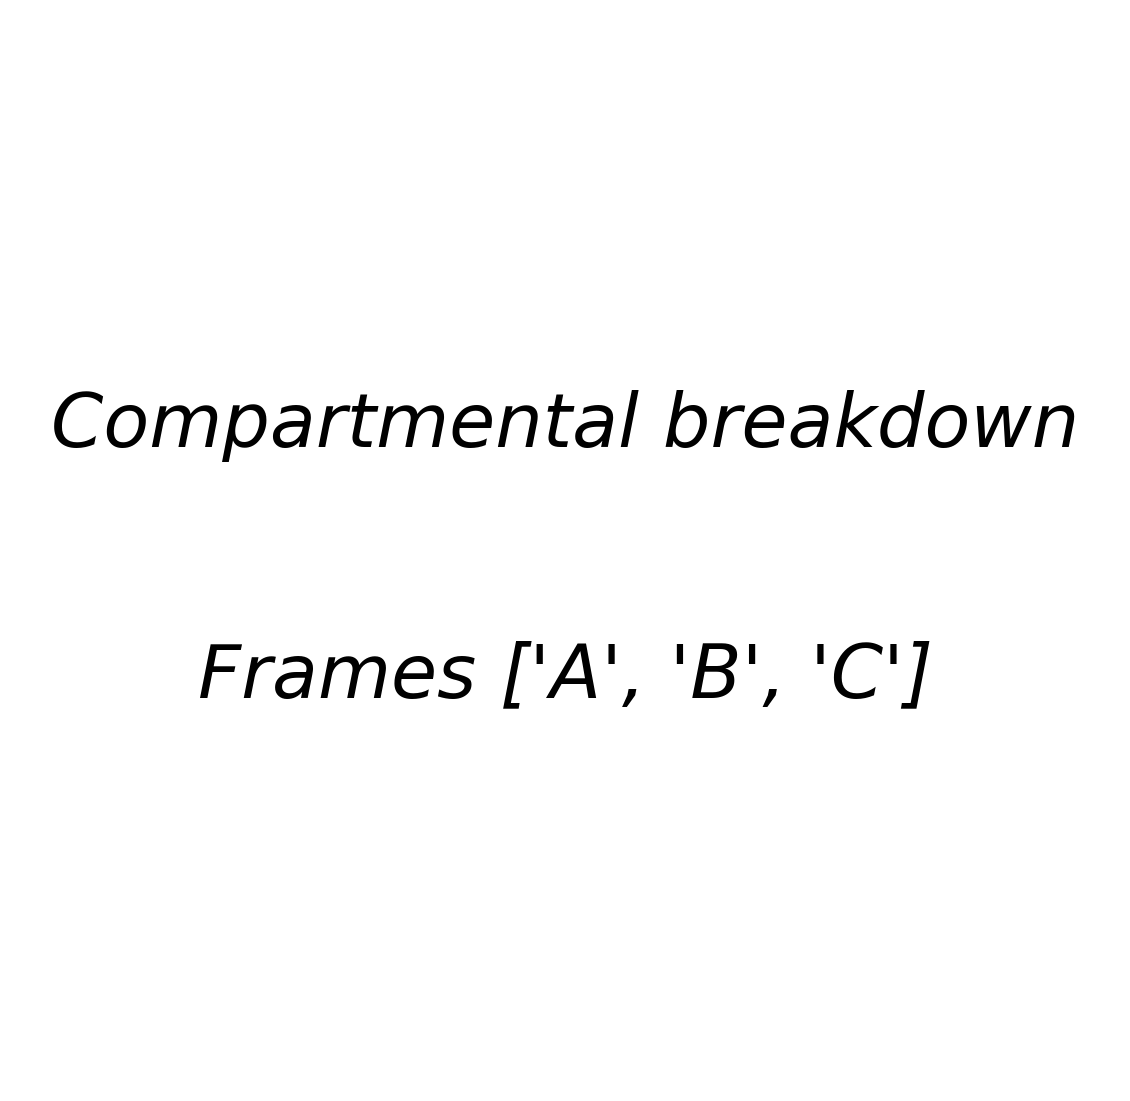

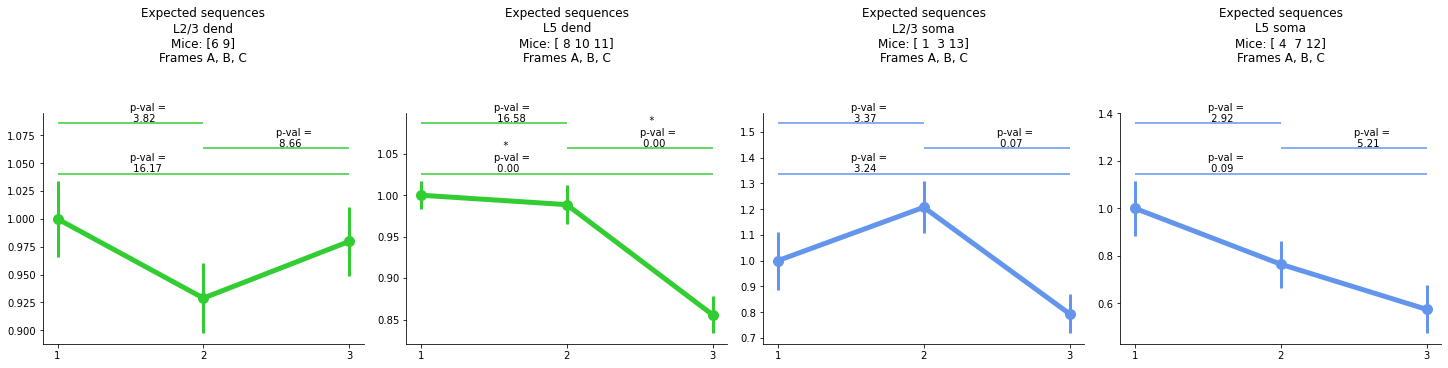

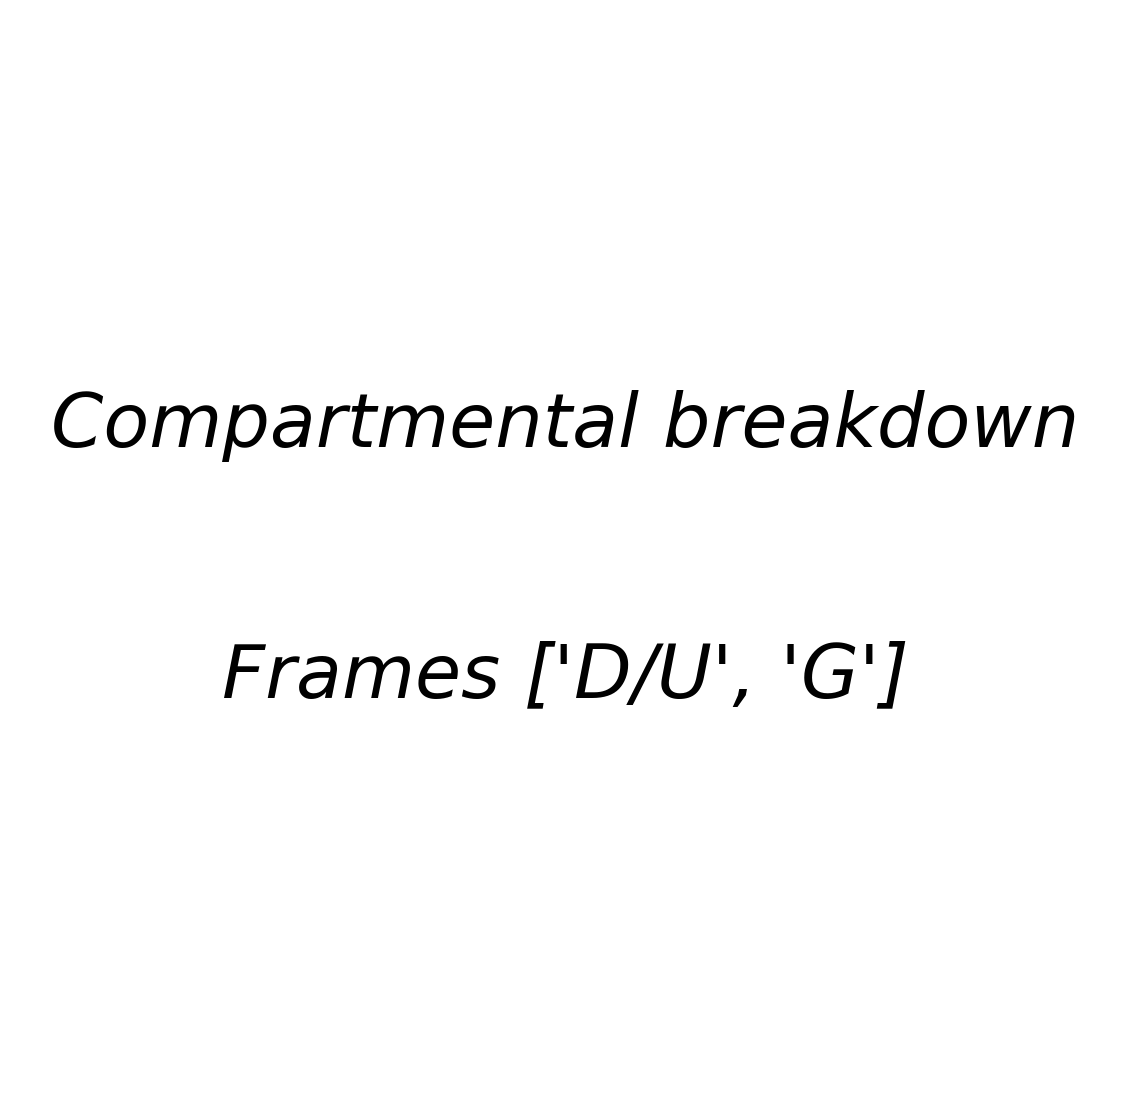

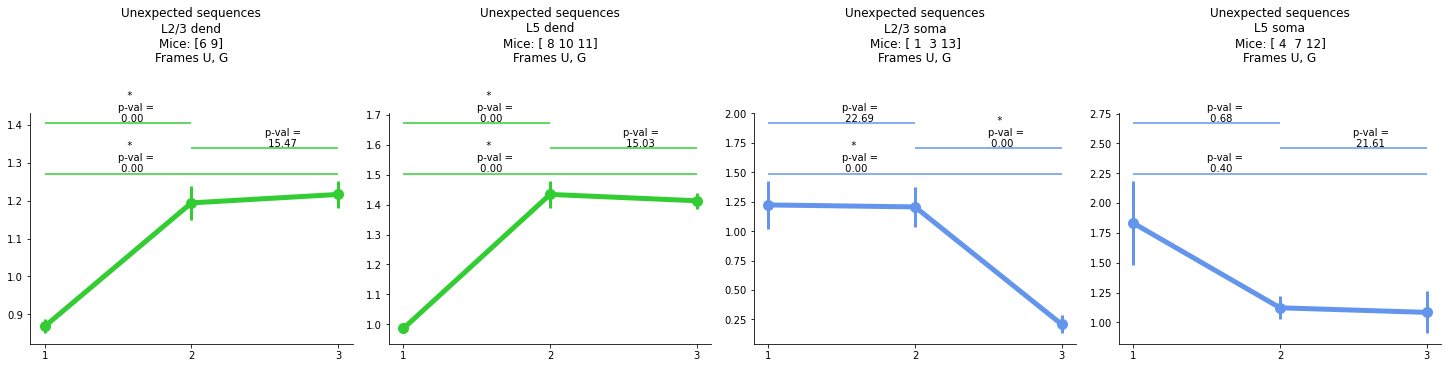

In [99]:
figsize=(20,5)
frames = ['A', 'B', 'C']
fig = make_text_slide('Compartmental breakdown\n\n\nFrames {}'.format(frames), 
                      figsize=(20,20))
fig = plot_layer_compartment_df(gab_abc_lyr_cmpt_dff_normed_df, mouse_df, frames, 
                                which_sessns, compartments, layers, figsize=figsize,
                                expec_str_list=['expec'],
                                title_frames=True)
frames = ['D/U', 'G']
fig = make_text_slide('Compartmental breakdown\n\n\nFrames {}'.format(frames), 
                      figsize=(20,20))
fig = plot_layer_compartment_df(gab_dug_lyr_cmpt_dff_normed_df, mouse_df, frames, 
                                which_sessns, compartments, layers, figsize=figsize,
                                expec_str_list=['unexp'],
                                title_frames=True)

layer L2/3 compartment dend
layer L5 compartment dend
layer L2/3 compartment soma
layer L5 compartment soma
0.19728446006774902 sec
layer L2/3 compartment dend
layer L5 compartment dend
layer L2/3 compartment soma
layer L5 compartment soma
0.3046410083770752 sec


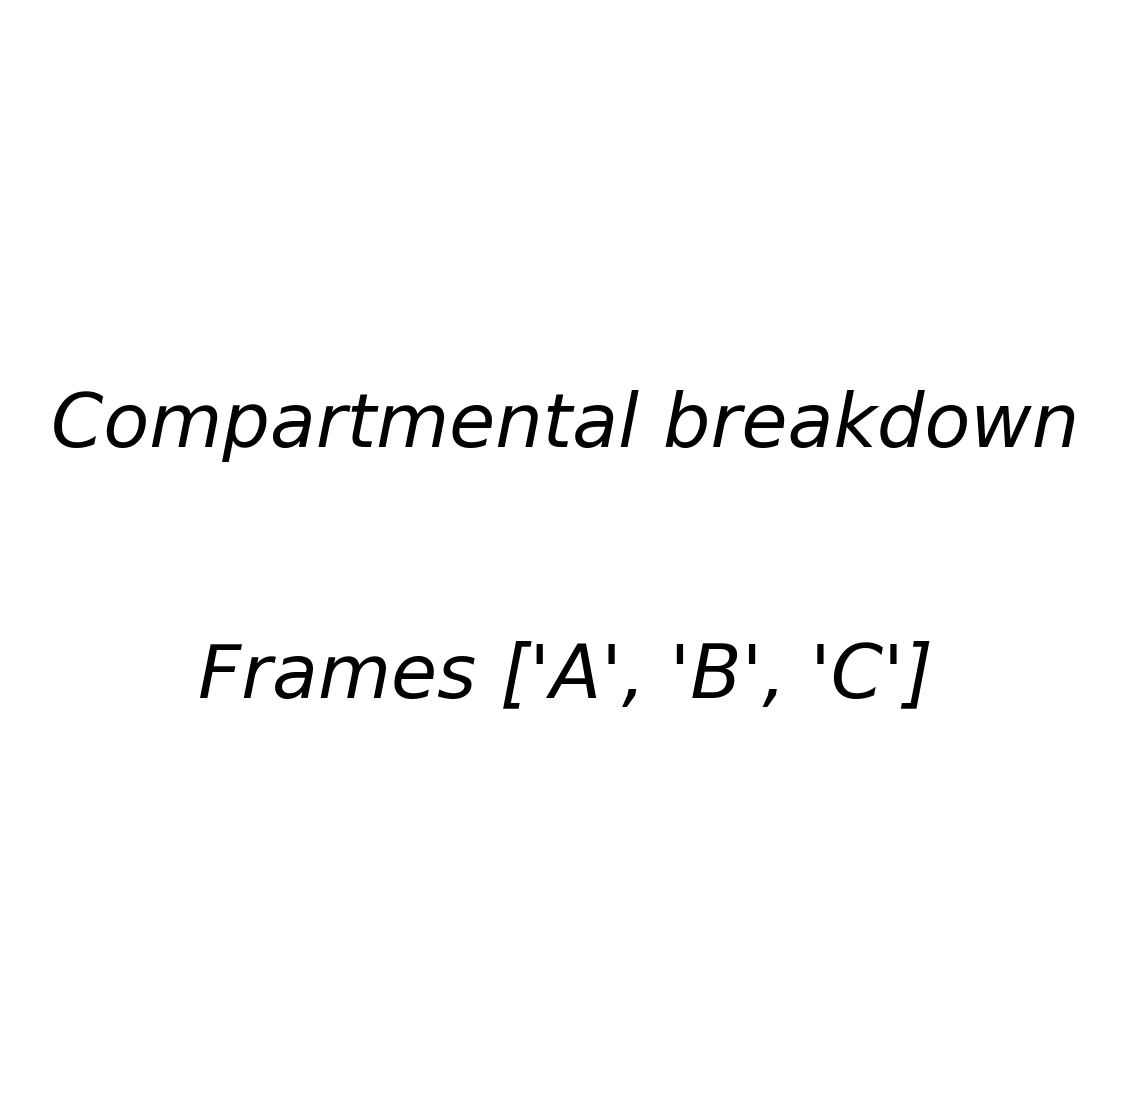

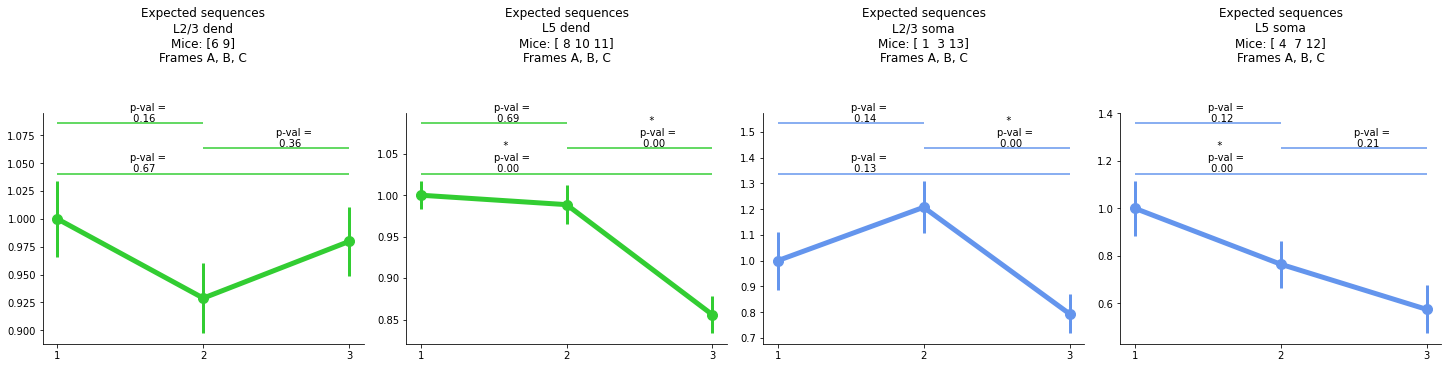

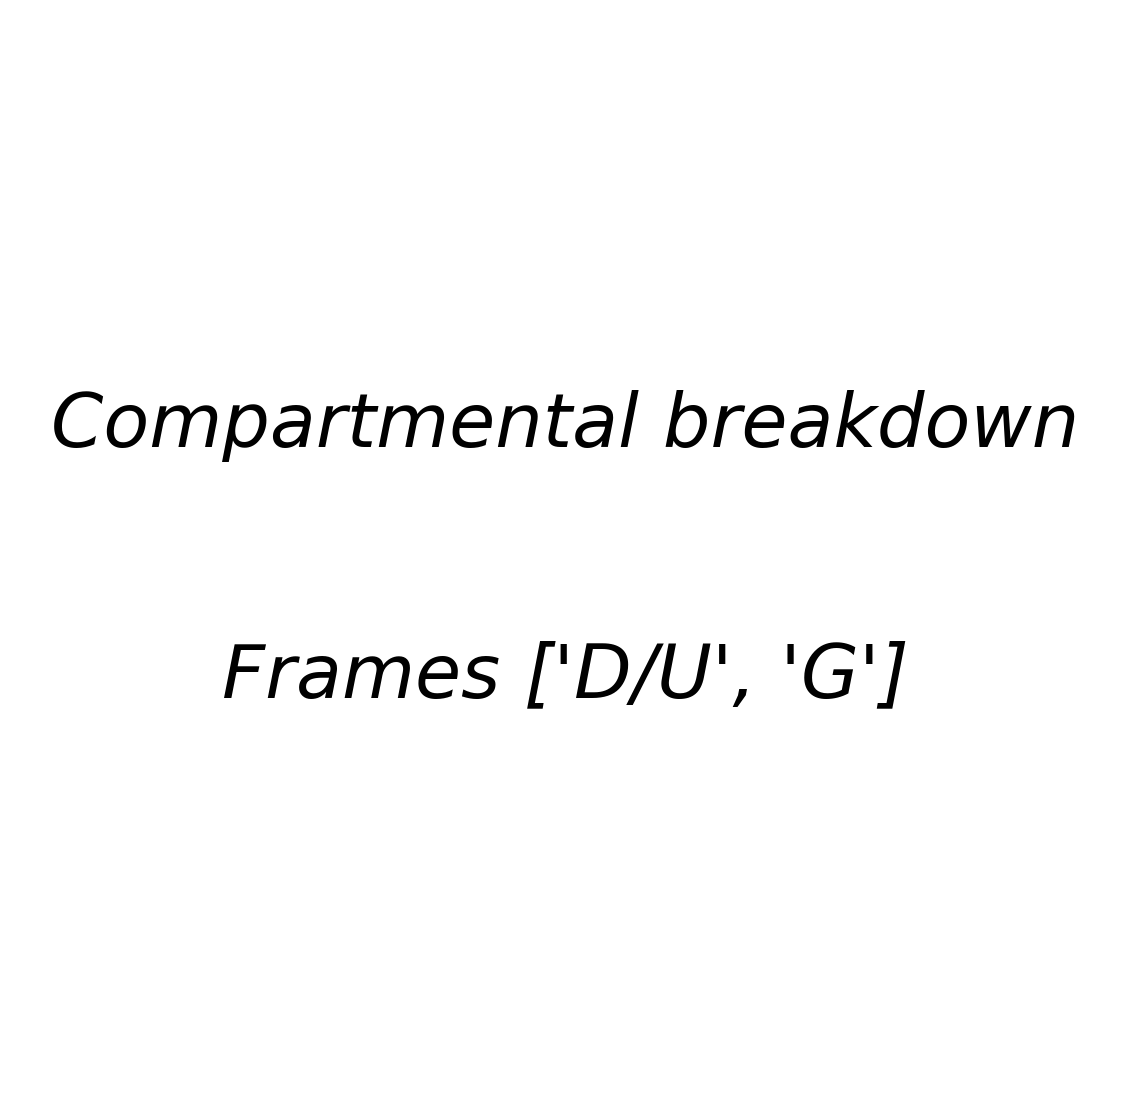

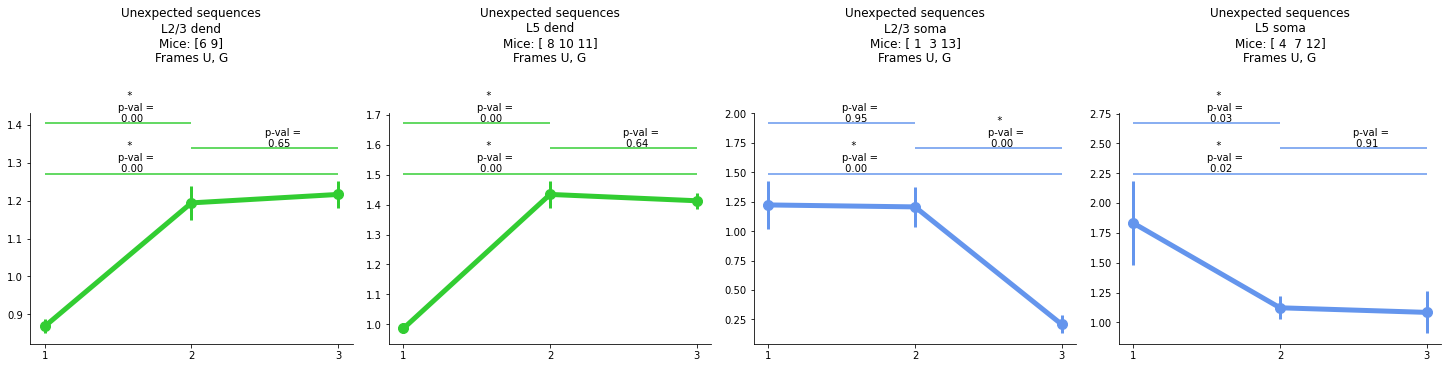

In [27]:
figsize=(20,5)
frames = ['A', 'B', 'C']
fig = make_text_slide('Compartmental breakdown\n\n\nFrames {}'.format(frames), figsize=(20,20))
fig = plot_layer_compartment_df(gab_abc_lyr_cmpt_dff_normed_df, mouse_df, frames, 
                                which_sessns, compartments, layers, figsize=figsize,
                                expec_str_list=['expec'],
                                title_frames=True)
frames = ['D/U', 'G']
fig = make_text_slide('Compartmental breakdown\n\n\nFrames {}'.format(frames), figsize=(20,20))
fig = plot_layer_compartment_df(gab_deg_lyr_cmpt_dff_normed_df, mouse_df, frames, 
                                which_sessns, compartments, layers, figsize=figsize,
                                expec_str_list=['unexp'],
                                title_frames=True)

In [28]:
figsize=(20,5)
pdf_fnm = 'gab-dff-changes-over-days--compartmental-breakdown--new.pdf'
with PdfPages(pdf_fnm) as pdf:
    frames = ['A', 'B', 'C']
    fig = make_text_slide('Compartmental breakdown\n\n\nFrames {}'.format(frames), figsize=(20,20))
    pdf.savefig()
    plt.close()    
    fig = plot_layer_compartment_df(gab_abc_lyr_cmpt_dff_normed_df, mouse_df, frames, 
                                    which_sessns, compartments, layers, figsize=figsize,
                                    expec_str_list=['expec'],
                                    title_frames=True)
    pdf.savefig()
    plt.close()

    frames = ['D/U', 'G']
    fig = make_text_slide('Compartmental breakdown\n\n\nFrames {}'.format(frames), figsize=(20,20))
    pdf.savefig()
    plt.close()    
    fig = plot_layer_compartment_df(gab_deg_lyr_cmpt_dff_normed_df, mouse_df, frames, 
                                    which_sessns, compartments, layers, figsize=figsize,
                                    expec_str_list=['unexp'],
                                    title_frames=True)
    pdf.savefig()
    plt.close()
    

layer L2/3 compartment dend
layer L5 compartment dend
layer L2/3 compartment soma
layer L5 compartment soma
0.19237041473388672 sec
layer L2/3 compartment dend
layer L5 compartment dend
layer L2/3 compartment soma
layer L5 compartment soma
0.21541166305541992 sec


<h4>Save summary data frames</h4>

In [29]:
gab_abc_lyr_cmpt_dff_normed_df.to_hdf('../data/gab-abc-lyr-cmpt-dff-normed-df.h5', 'data')
gab_deg_lyr_cmpt_dff_normed_df.to_hdf('../data/gab-deg-lyr-cmpt-dff-normed-df.h5', 'data')

/home/jay/anaconda3/envs/osca/lib/python3.6/site-packages/pandas/core/generic.py:2449: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['layer', 'compartment', 'mouse_ns', 'sess_123_num_rois',
       'expec_dff__all_rois', 'expec_dff__mn__sess_123',
       'expec_dff__se__sess_123', 'unexp_dff__all_rois',
       'unexp_dff__mn__sess_123', 'unexp_dff__se__sess_123'],
      dtype='object')]

  encoding=encoding,


<h2>Bricks, compartmental</h2>

<h4>Make summary data frames</h4>

In [35]:
brk_lyr_cmpt_dff_normed_df

,layer,compartment,mouse_ns,sess_123_num_rois,expec_dff__all_rois,expec_dff__mn__sess_123,expec_dff__se__sess_123,unexp_dff__all_rois,unexp_dff__mn__sess_123,unexp_dff__se__sess_123
0,L2/3,dend,"[6, 9]","[1355, 648, 845]","[0.6983042492299046, 1.7838682979657337, 0.505...","[1.0, 0.9256384225797881, 0.9241085701223779]","[0.016484519143834617, 0.021009228960383968, 0...","[0.7229448029328555, 2.525472158867884, 0.9479...","[1.1765589082787338, 1.1105729400186122, 1.279...","[0.02114180858429526, 0.026676119624608294, 0...."
1,L5,dend,"[8, 10, 11]","[2807, 1633, 1664]","[0.6153802866586795, 0.32024763490683356, 0.58...","[1.0, 0.8698902842202411, 0.8980640855925578]","[0.014617466185199832, 0.016356360211304256, 0...","[0.4059560295679439, 0.37481626323833017, 1.09...","[0.9648199477315453, 0.8266551648806876, 0.889...","[0.015551924312377195, 0.017277264672517535, 0..."
2,L2/3,soma,"[1, 3, 13]","[407, 388, 397]","[1.3719515373892233, 0.0879128822434288, 0.299...","[0.9999999999999999, 0.9714766684970061, 0.832...","[0.0957506734064072, 0.10098191613398605, 0.08...","[1.4159333286459952, 0.09533226814625874, 0.32...","[1.3168323368282133, 1.2835818869099982, 1.231...","[0.13156225464346447, 0.12734307652977825, 0.1..."
3,L5,soma,"[4, 7, 12]","[204, 183, 205]","[0.20127425654968611, 0.2728379007733935, 0.39...","[1.0, 0.6911027891490484, 0.8256734659138654]","[0.08426851050645662, 0.0586480631379487, 0.06...","[0.010683059710128399, 0.6172115663330768, 0.4...","[0.9641964990784274, 0.6325721479404561, 0.853...","[0.09422852681979095, 0.05869577497215658, 0.0..."


In [37]:
'''Normed.  All mice.  Any surp'''

t = time.time()
# n_perm = int(1e2)
# n_perm = int(1e4)
n_perm = int(1e5)

# dff_df__all_mice = pd.read_hdf('dff_df__all_mouse_ns.h5')
# dff_df__any_surp__all_mice = pd.read_hdf('dff_df__any_surp__all_mouse_ns.h5')
# dff_df__sess_123_mice = pd.read_hdf('dff_df__sess_123_mouse_ns.h5')
# dff_df__any_surp__sess_123_mice__matched_rois = pd.read_hdf('dff_df__any_surp__sess_123_mouse_ns__matched_rois.h5')

stimtype = 'bricks'
dff_df = brk_dff_df
brk_dff_normed_df = make_normed_df(dff_df, stimtype)
frames = ['brk']
brk_lyr_cmpt_dff_normed_df = make_summary_df(brk_dff_normed_df, which_sessns, frames, compartments, layers)
# for surp_str in ['any', 'nsurp', 'surp']:
for surp_str in ['expec', 'unexp']:
    print(surp_str)
    compute_intersession_pvals(brk_lyr_cmpt_dff_normed_df, surp_str, compartments, layers, n_perm)
    print('{:.01f} sec'.format(time.time()-t))


expec
layer L2/3 compartment dend
layer L5 compartment dend
layer L2/3 compartment soma
layer L5 compartment soma
191.8 sec
unexp
layer L2/3 compartment dend
layer L5 compartment dend
layer L2/3 compartment soma
layer L5 compartment soma
383.7 sec


<h4>Plot summary data frames</h4>

layer L2/3 compartment dend
layer L5 compartment dend
layer L2/3 compartment soma
layer L5 compartment soma
layer L2/3 compartment dend
layer L5 compartment dend
layer L2/3 compartment soma
layer L5 compartment soma
0.41703271865844727 sec


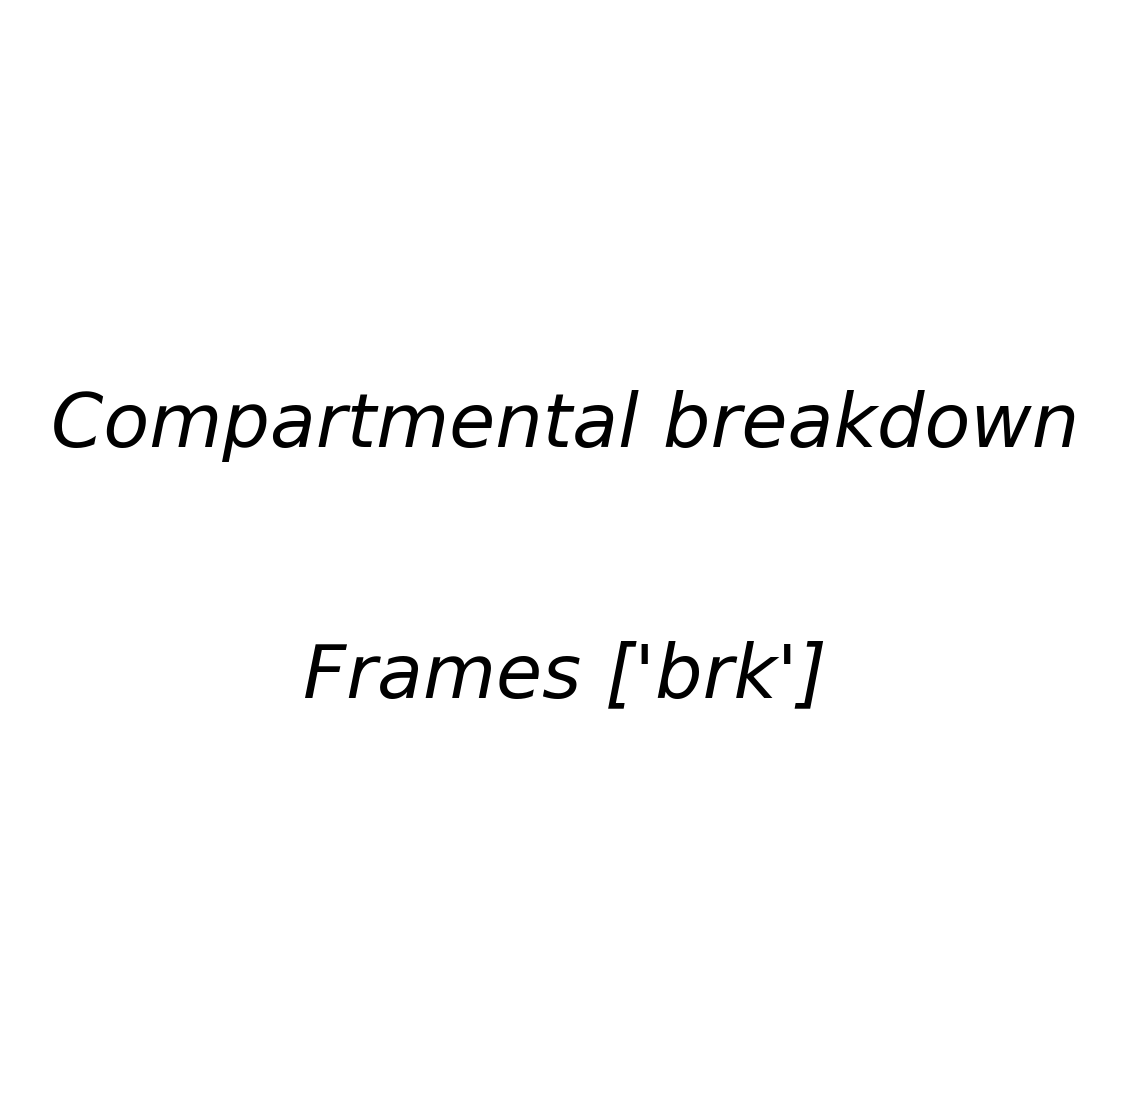

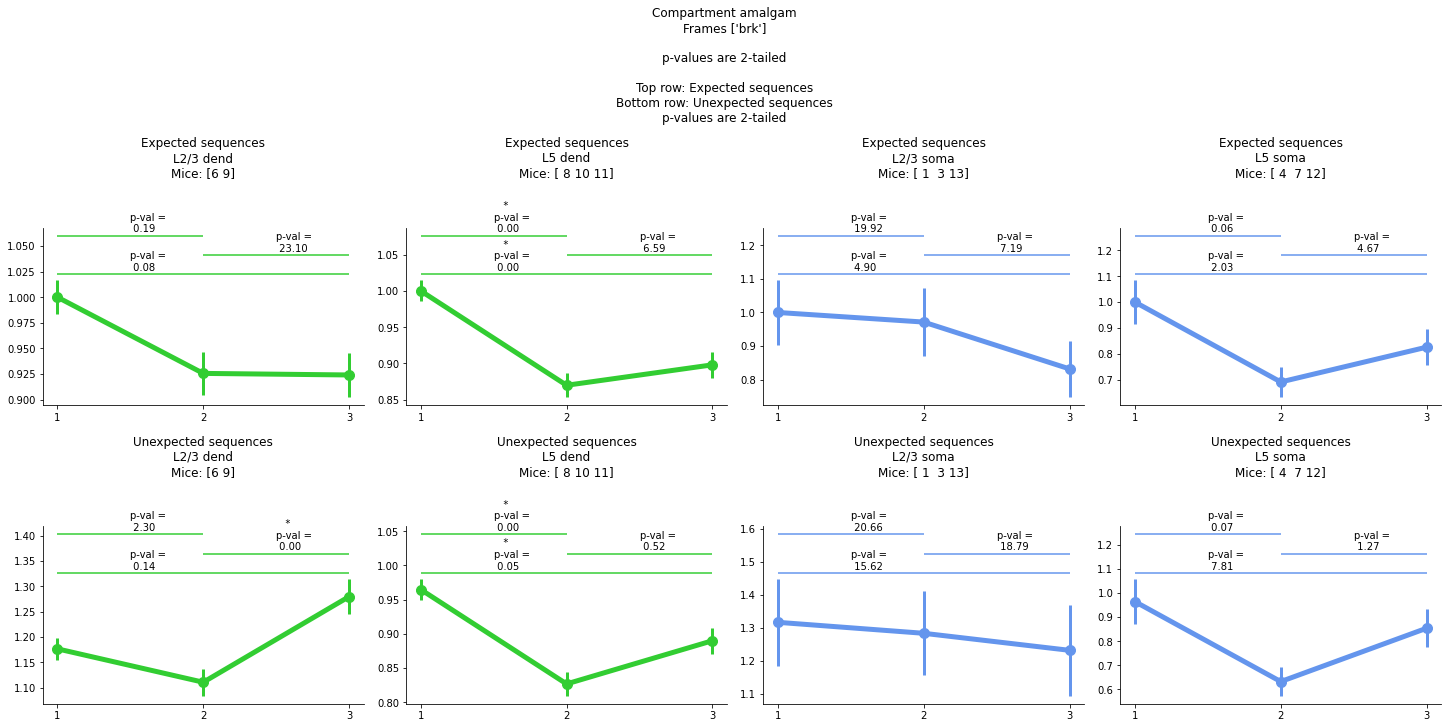

In [38]:
figsize=(20,10)
frames = ['brk']
fig = make_text_slide('Compartmental breakdown\n\n\nFrames {}'.format(frames), figsize=(20,20))
fig = plot_layer_compartment_df(brk_lyr_cmpt_dff_normed_df, mouse_df, frames, 
                                which_sessns, compartments, layers, figsize=figsize,
                                expec_str_list=['expec', 'unexp'],
                                title_frames=False)


layer L2/3 compartment dend
layer L5 compartment dend
layer L2/3 compartment soma
layer L5 compartment soma
layer L2/3 compartment dend
layer L5 compartment dend
layer L2/3 compartment soma
layer L5 compartment soma
0.403552770614624 sec


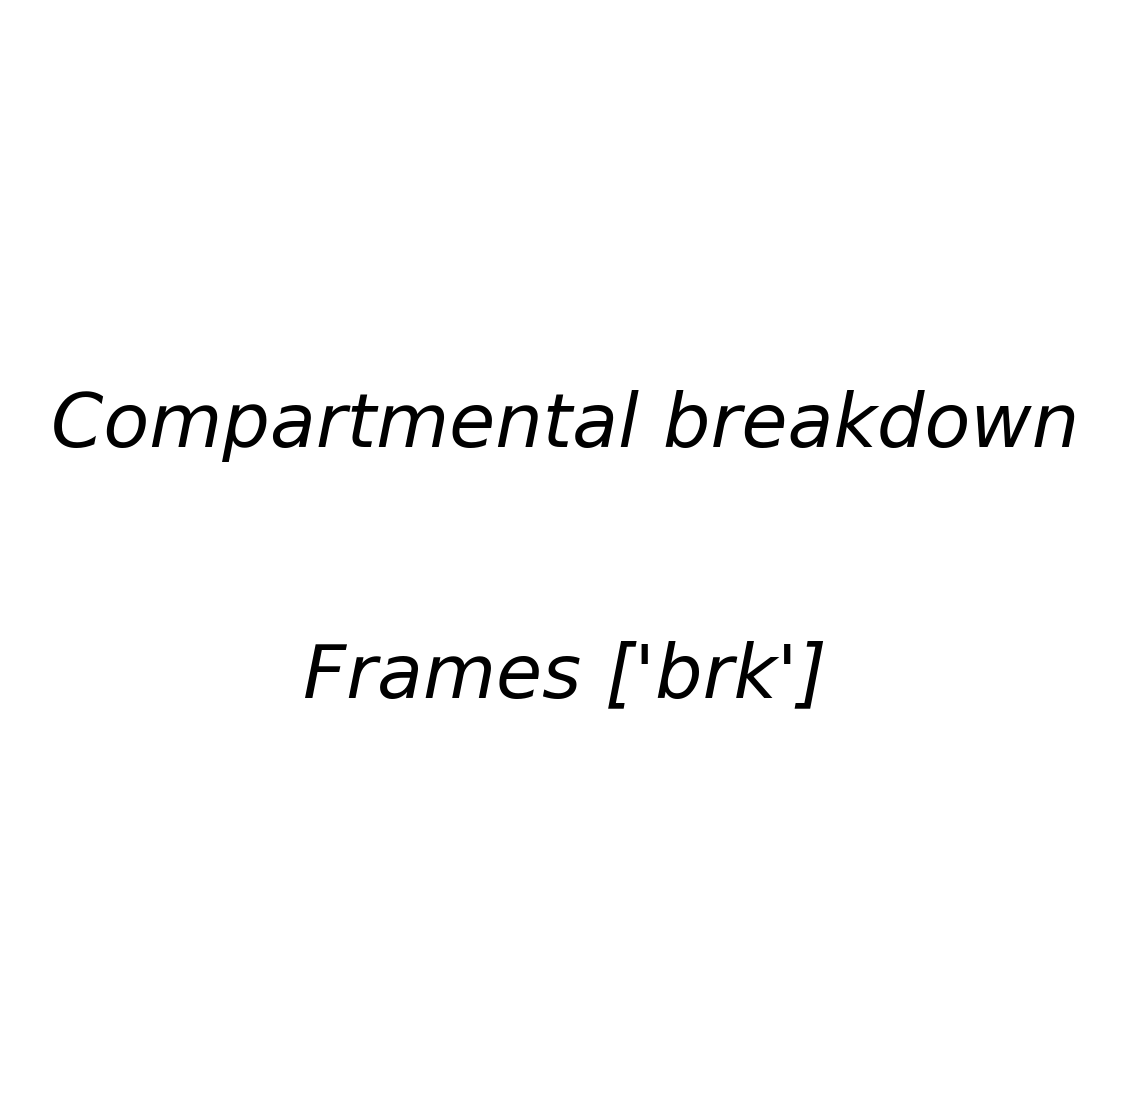

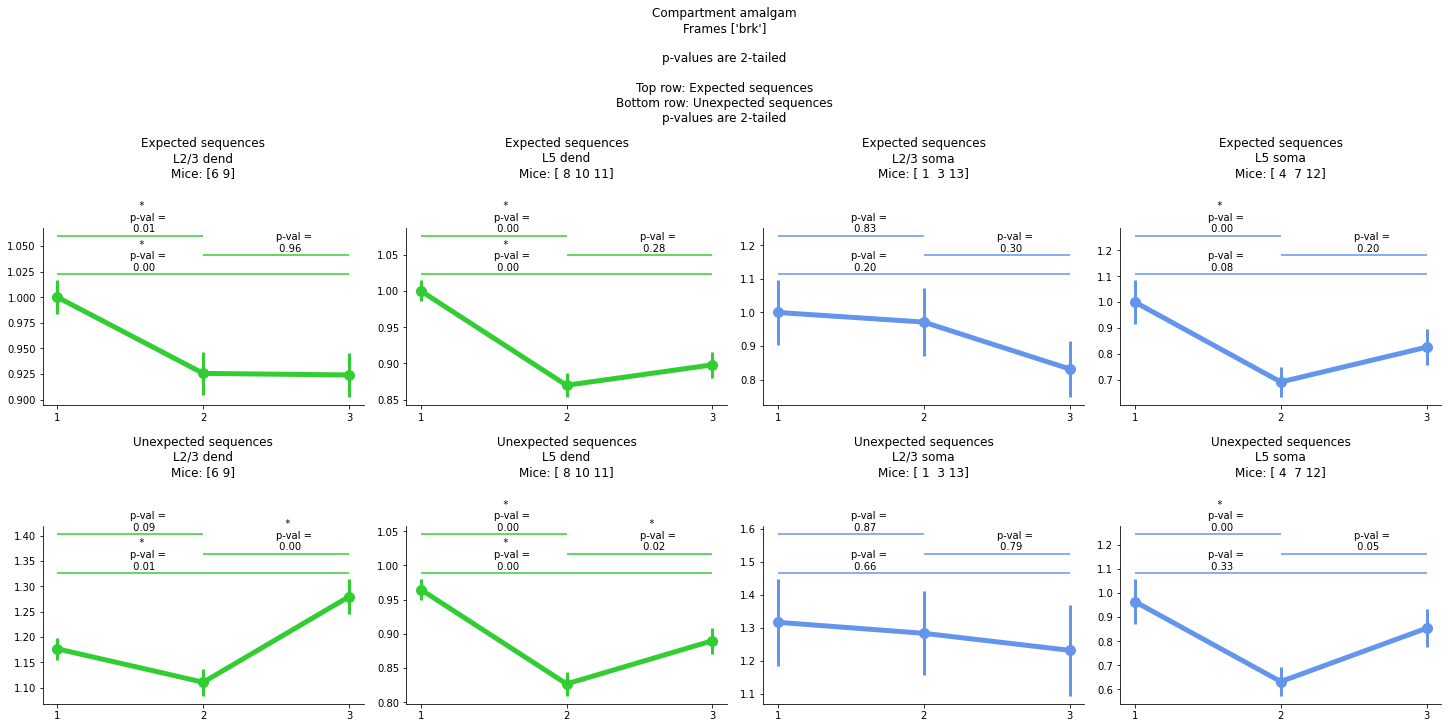

In [31]:
figsize=(20,10)
frames = ['brk']
fig = make_text_slide('Compartmental breakdown\n\n\nFrames {}'.format(frames), figsize=(20,20))
fig = plot_layer_compartment_df(brk_lyr_cmpt_dff_normed_df, mouse_df, frames, 
                                which_sessns, compartments, layers, figsize=figsize,
                                expec_str_list=['expec', 'unexp'],
                                title_frames=False)


In [ ]:
figsize=(20,10)
pdf_fnm = 'brk-dff-changes-over-days--compartmental-breakdown--new.pdf'
with PdfPages(pdf_fnm) as pdf:
    frames = ['brk']
    fig = make_text_slide('Compartmental breakdown\n\n\nFrames {}'.format(frames), figsize=(20,20))
    pdf.savefig()
    plt.close()    
    fig = plot_layer_compartment_df(brk_lyr_cmpt_dff_normed_df, mouse_df, frames, 
                                    which_sessns, compartments, layers, figsize=figsize,
                                    expec_str_list=['expec', 'unexp'],
                                    title_frames=False)
    pdf.savefig()
    plt.close()
   

<h4>Save summary data frames</h4>

In [32]:
brk_lyr_cmpt_dff_normed_df.to_hdf('../data/brk-lyr-cmpt-dff-normed-df.h5', 'data')

# Functions

## Analysis functions

In [ ]:
# def set_up_mouse_info(mouse_df_fnm):
#     """
#     Returns: 
#       - mouse_df_fnm
#       - mouse_df
#       - mouse_ns_full
#       - mouse_ns_123 (just those with all of sessions 1-3
#     """

#     mouse_df = pd.read_csv(mouse_df_fnm) 
#     mouse_df = mouse_df[(mouse_df.runtype=='prod') & (mouse_df.pass_fail=='P')
#                         & (mouse_df.all_files)]
#     mouse_ns_full = mouse_df['mouse_n'].unique()#[:1]
#     mouse_ns_sess_123 = []

#     print('All mice: ', mouse_ns_full)

#     for mouse_n in mouse_ns_full:
#         sess_ns = mouse_df[(mouse_df.mouse_n==mouse_n)]['sess_n'].values
#         if np.sum(np.isin(sess_ns, np.array([1,2,3])))>=3:
#             mouse_ns_sess_123.append(mouse_n)
#         # want mouse 8 as well for running.  will update pupil diameter later
#         elif mouse_n==8:
#             mouse_ns_sess_123.append(mouse_n)

#     mouse_ns_sess_123 = np.array(mouse_ns_sess_123)
#     print('Mice with all of sessions 1-3 :', mouse_ns_sess_123)
    
#     return mouse_df_fnm, mouse_df, mouse_ns_full, mouse_ns_sess_123

In [ ]:
<<1>>

In [145]:
def make_session_averaged_df(mouse_df, mouse_df_fnm, mouse_ns, sess_ns, stimtype_list,
                             only_matched_rois):
    """
    Returns dataframes (1 each for Gabor and visual flow stimuli), organized by df/f 
    session averages for each ROI for expected and unexpected events for gabor and 
    visual flow stimuli. Averages for Gabor stimuli are further separated by Gabor 
    frames (A, B, C, D, U, G).
    
    Parameters
    ----------
    dff_df : Pandas DataFrame
        Empty dataframe with column info filled out; this function fills in the 
        column data
    mouse_df : Pandas DataFrame
        Dataframe with mouse information
    mouse_df_fnm : string
        File name of mouse_df
    mouse_n : number
        Mouse number
    sess_n : number
        Session number
    stimtype : string
        Either 'gabors' or 'bricks'
    only_matched_rois : boolean
        If 'True', obtain df/f data only for ROIs that have been matched 
        across sessions
        
    Returns
    -------
    gab_dff_df, brk_dff_df : Pandas DataFrames
        Contains, for each stimulus type/mouse/session/ROI, df/f values averaged 
        across all sequence presentations in the session. For visual flow (bricks),
        the data are segregated into expected and unexpected, while for Gabors, the
        data are further grouped into Gabor frames (A, B, C, D, U, G)

        Columns:
            'mouse_n', 'sess_n', layer', 'compartment', 'stimtype', 'num_rois' :
                mouse number, session number, layer, and compartment, stimulus type,
                and number of ROIs, respectively
            For Gabors:
                'expec_<frm>' for <frm> in {a,b,c,d,g} :
                    1-D array of df/f values for each ROI for specified expected 
                    Gabor frame, averaged over all presentations in the session
                'unexp_<frm>' for <frm> in {a,b,c,u,g} :
                    1-D array of df/f values for each ROI for specified unexpected 
                    (surprise) Gabor frame, averaged over all presentations in the 
                    session
            For visual flow (bricks):
                'brk_expec' :
                    1-D array of df/f values for each ROI for expected visual flow
                    sequences, averaged over all sequences in the session
                'brk_unexp' :
                    1-D array of df/f values for each ROI for unexpected (surprise) 
                    visual flow sequences, averaged over all sequences in the session
    """

    # declarations/initializations
    gab_dff_df = pd.DataFrame(columns = ['mouse_n', 'sess_n', 'layer', 
                                         'compartment', 'stimtype', 'num_rois',
                                         'expec_a', 'expec_b', 'expec_c', 'expec_d',
                                         'expec_g',
                                         'unexp_a', 'unexp_b', 'unexp_c', 'unexp_u',
                                         'unexp_g'])

    brk_dff_df = pd.DataFrame(columns = ['mouse_n', 'sess_n', 'layer', 
                                         'compartment', 'stimtype', 'num_rois',
                                         'brk_expec', 'brk_unexp'])
    layers_dict = {'L23-Cux2': 'L2/3', 'L5-Rbp4': 'L5'}
    gabfr_dict = {'A':0, 'B':1, 'C':2, 'D/U':3, 'G':3}
    t = time.time()

    # Loops to obtain data for each stimulus types, mouse, and session 
    for stimtype in stimtype_list:
        print('\nStimulus:', stimtype)
        for mouse_n in mouse_ns:
            if mouse_n > 1:
                print('\n\n')
            for sess_n in sess_ns:
                # Account for different mice's missing sessions
                if not np.isin(sess_n, mouse_df[mouse_df['mouse_n']==mouse_n]
                               ['sess_n'].values):
                    print('nope for mouse ', mouse_n, ', sess ', sess_n)
                    continue
                print('\nMouse ', mouse_n, '  Session', sess_n)
                
                # Finally, actually obtain new df/f data by adding line to dataframe
                if stimtype=='gabors':
                    gab_all_mn_dff_df = \
                        get_session_averaged_df_row(gab_all_mn_dff_df, mouse_df, 
                                                    mouse_df_fnm, mouse_n, sess_n, 
                                                    stimtype, only_matched_rois)
                elif stimtype=='bricks':
                    brk_all_mn_dff_df = \
                        get_session_averaged_df_row(brk_all_mn_dff_df, mouse_df, 
                                                    mouse_df_fnm, mouse_n, sess_n,
                                                    stimtype, only_matched_rois)    
    
        print( '{:.3f} sec\n'.format(time.time() - t) )        
            

    return gab_dff_df, brk_dff_df

In [146]:
def get_session_averaged_df_row(dff_df, mouse_df, mouse_df_fnm, mouse_n, sess_n, 
                                stimtype, only_matched_rois):
    """
    Adds next line (for given mouse_n, sess_n) to dataframe (dff_df), organized by 
    df/f session averages for each ROI for expected and unexpected events for gabor and
    visual flow stimuli. Averages for Gabor stimuli are further separated by Gabor
    frames (A, B, C, D, U, G).
    
    Parameters
    ----------
    dff_df : Pandas DataFrame
        Empty dataframe with column info filled out; this function fills in the 
        column data
    mouse_df : Pandas DataFrame
        Dataframe with mouse information
    mouse_df_fnm : string
        File name of mouse_df
    mouse_n : number
        Mouse number
    sess_n : number
        Session number
    stimtype : string
        Either 'gabors' or 'bricks'
    only_matched_rois : boolean
        If 'True', obtain df/f data only for ROIs that have been matched 
        across sessions
        
    Returns
    -------
    dff_df : Pandas DataFrame
        Contains, for each mouse/session/ROI, df/f values averaged across all sequence
        presentations in the session. For visual flow (bricks), the data are segregated
        into expected and unexpected, while for Gabors, the data are further grouped
        into Gabor frames (A, B, C, D, U, G)

        Columns:
            'mouse_n', 'sess_n', layer', 'compartment', 'stimtype', 'num_rois' :
                mouse number, session number, layer, and compartment, stimulus type,
                and number of ROIs, respectively
            For Gabors:
                'expec_<frm>' for <frm> in {a,b,c,d,g} :
                    1-D array of df/f values for each ROI for specified expected 
                    Gabor frame, averaged over all presentations in the session
                'unexp_<frm>' for <frm> in {a,b,c,u,g} :
                    1-D array of df/f values for each ROI for specified unexpected 
                    (surprise) Gabor frame, averaged over all presentations in the 
                    session
            For visual flow (bricks):
                'brk_expec' :
                    1-D array of df/f values for each ROI for expected visual flow
                    sequences, averaged over all sequences in the session
                'brk_unexp' :
                    1-D array of df/f values for each ROI for unexpected (surprise) 
                    visual flow sequences, averaged over all sequences in the session
    """
    
    # declarations/initializations
    layers_dict = {'L23-Cux2': 'L2/3', 'L5-Rbp4': 'L5'}
    gabfr_dict = {'A':0, 'B':1, 'C':2, 'D/U':3, 'G':3}
    idx = dff_df.shape[0]
    layer = layers_dict[mouse_df[(mouse_df['mouse_n']==mouse_n) & 
                                 (mouse_df['sess_n']==sess_n)]['line'].values[0]]
    compartment = mouse_df[(mouse_df['mouse_n']==mouse_n) & 
                           (mouse_df['sess_n']==sess_n)]['plane'].values[0]

    sessid = mouse_df[(mouse_df['mouse_n']==mouse_n) & 
                      (mouse_df['sess_n']==sess_n)]['sessid'].values[0]
    expec_dff = {}
    unexp_dff = {}

    # Obtain session objects
    sess = session.Session(datadir, sessid, only_matched_rois=only_matched_rois)
    sess.extract_sess_attribs(mouse_df=mouse_df_fnm)
    sess.extract_info(fulldict=False, roi=True, run=False, pupil=False) 
    stim = sess.get_stim(stimtype)

    # Obtain df/f for gabors or visual flow, averaged over trials / repeat 
    #  presentations
    print('Getting data for {}'.format(stimtype))
    if stimtype=='gabors':
        for fr in gabfr_dict.keys():
            expec_dff[fr] = get_dff_tensor(stim, stimtype, fr, gabfr_dict, surp=0)
            unexp_dff[fr]  = get_dff_tensor(stim, stimtype, fr, gabfr_dict, surp=1)
            n_rois = expec_dff[fr].shape[0]
        dff_df.loc[idx] = [mouse_n, sess_n, layer, compartment, stimtype, n_rois,
                           expec_dff['A'], expec_dff['B'], expec_dff['C'],
                           expec_dff['D/U'], expec_dff['G'],
                           unexp_dff['A'], unexp_dff['B'], unexp_dff['C'],
                           unexp_dff['D/U'], unexp_dff['G']]
    elif stimtype=='bricks':
        # Frame and gabfr_dict are dummies here
        expec_dff = get_dff_tensor(stim, stimtype, 'A', gabfr_dict, surp=0)
        unexp_dff = get_dff_tensor(stim, stimtype, 'A', gabfr_dict, surp=1)
        n_rois = expec_dff.shape[0]
        dff_df.loc[idx] = [mouse_n, sess_n, layer, compartment, stimtype, n_rois,
                           expec_dff, unexp_dff]


    return dff_df

In [118]:
def get_dff_tensor(stim, stimtype, fr, gabfr_dict, surp):
    """
    Provides df/f data integrated in time and averaged over all sequences in the
    session in a 1-D array of length = number of ROIs
    
    Parameters
    ----------
    stim : stimulus object
        Object used to access df/f data for each mouse/session 
    stimtype : string
        Either 'gabors' or 'bricks'
    fr : String
        Gabor frame ('A', 'B', 'C', 'D/U', 'G')
    gabfr_dict : dictionary
        Matches the Gabor frame ('fr', above) with the frame number used in the 
        codebase to access that particular frame
    surp : number
        Either 0 (for expected sequences) or 1 (for unexpected/surprise sequences) 

    Returns
    -------
        dff_data : 1-D array
            Df/f data, averaged over all sequences in the session for each ROI
    """
    
    # declarations/initializations
    prepost_dict = {'gabors':{'A':{'pre':0, 'post':0.3},
                              'B':{'pre':0, 'post':0.3},
                              'C':{'pre':0, 'post':0.3},
                              'D/U':{'pre':0, 'post':0.3},
                              'G':{'pre':-0.3, 'post':0.6}},
                    'bricks':{'pre':0,'post':1}}
    if stimtype=='gabors':
        pre = prepost_dict[stimtype][fr]['pre']
        post = prepost_dict[stimtype][fr]['post']
    elif stimtype=='bricks':
        pre = prepost_dict[stimtype]['pre']
        post = prepost_dict[stimtype]['post']
        print('pre, post = ', pre, post)

    # Obtain df/f values for given session (provided by 'stim' object).  'remconsec'
    #  set to false because we need all Gabor frame presentations
    seg_ns = stim.get_segs_by_criteria(surp=surp, gabfr=gabfr_dict[fr], 
                                       remconsec=False, by='seg')
    twop_fr_ns = stim.get_twop_fr_by_seg(seg_ns, first=True, 
                                         ch_fl=[pre, post])['first_twop_fr']
    # Note: since we're interested in comparing the mean dff across days, 
    #  we set scale to false
    roi_data_df = stim.get_roi_data(twop_fr_ns, pre, post, integ=True, scale=False)
    # roi x seq
    dff_data = gen_util.reshape_df_data(roi_data_df, squeeze_cols=True)
    # Average over all sequences in session
    dff_data = np.nanmean(dff_data, axis=1)
    if fr=='A' and surp==0:
        print('Number of ROIs:', dff_data.shape[0])
    
    return dff_data

In [149]:
def make_normed_summary_dfs(gab_mn_dff_df, brk_mn_dff_df, sess_ns, 
                            n_perm=1e5, bonf_n=24):
    """
    Returns normalized dataframes, organized by layer/compartment.
    
    Parameters
    ----------
    gab_mn_dff_df, brk_mn_dff_df : Pandas DataFrames
        Unnormalized dataframe w/ session-averaged df/f values for each mouse/sess/ROI.
    sess_ns : 1-D arraylike of numbers
        Sessions for which we have df/f data in the dataframes.
    n_perm : number
        Number of permutations to use in permutation tests for p-values.
    bonf_n : number
        Number of multiple comparisons to correct for via Bonferroni correction.
    
    Returns
    -------
    gab_abc_lyr_cmpt_dff_normed_df, gab_dug_lyr_cmpt_dff_normed_df,
    brk_lyr_cmpt_dff_normed_df : Pandas DataFrames
        Contains, for each mouse/session/ROI, df/f values averaged across all sequence
        presentations in the session. For visual flow (bricks), the data are 
        segregated into expected and unexpected, while for Gabors, the data are 
        further grouped into Gabor frames (A, B, C, D, U, G)

        Columns:
            'mouse_n', 'sess_n', layer', 'compartment', 'stimtype', 'num_rois' :
                mouse number, session number, layer, and compartment, stimulus type,
                and number of ROIs, respectively
            For Gabors:
                'expec_<frm>' for <frm> in {a,b,c,d,g} :
                    1-D array of df/f values for each ROI for specified expected 
                    Gabor frame, averaged over all presentations in the session and 
                    divided by the mean 
                'unexp_<frm>' for <frm> in {a,b,c,u,g} :
                    1-D array of df/f values for each ROI for specified unexpected 
                    (surprise) Gabor frame, averaged over all presentations in the 
                    session
            For visual flow (bricks):
                'brk_expec' :
                    1-D array of df/f values for each ROI for expected visual flow
                    sequences, averaged over all sequences in the session
                'brk_unexp' :
                    1-D array of df/f values for each ROI for unexpected (surprise) 
                    visual flow sequences, averaged over all sequences in the session

    """

    t = time.time()
    layers = ['L2/3', 'L5']
    compartments = ['dend', 'soma']
    
    print('Making normalized dataframes\n')
    gab_mn_dff_normed_df = make_normed_df(gab_mn_dff_df, 'gabors')
    brk_mn_dff_normed_df = make_normed_df(brk_mn_dff_df, 'bricks')
    
    print('\n\nMake summarized dataframe for frames A, B, C\n')
    frames = ['A', 'B', 'C']
    gab_abc_lyr_cmpt_dff_normed_df = \
        make_summary_df(gab_mn_dff_normed_df, sess_ns, frames, 
                        compartments, layers)
    frames = ['D/U', 'G']
    gab_dug_lyr_cmpt_dff_normed_df = \
        make_summary_df(gab_mn_dff_normed_df, sess_ns, frames, 
                        compartments, layers)

    frames = ['brk']
    brk_lyr_cmpt_dff_normed_df = make_summary_df(brk_mn_dff_normed_df, sess_ns, 
                                                 frames, compartments, layers)

    for expec_str in ['expec', 'unexp']:
        print(expec_str, 'sequences')
        print('\n\nCompute intersession p-values for Gabor frames A, B, C\n')
        compute_intersession_pvals(gab_abc_lyr_cmpt_dff_normed_df, expec_str, 
                                   compartments, layers, n_perm, bonf_n)

        print('\n\nCompute intersession p-values for Gabor frames D/U, G\n')
        compute_intersession_pvals(gab_dug_lyr_cmpt_dff_normed_df, expec_str, 
                                   compartments, layers, n_perm, bonf_n)
        
        print('\n\nCompute intersession p-values for bricks\n')
        compute_intersession_pvals(brk_lyr_cmpt_dff_normed_df, expec_str, 
                                   compartments, layers, n_perm, bonf_n)
        print('{:.01f} sec'.format(time.time()-t))
        
    return gab_abc_lyr_cmpt_dff_normed_df, gab_dug_lyr_cmpt_dff_normed_df, \
           brk_lyr_cmpt_dff_normed_df

In [148]:
def make_normed_df(dff_df, stimtype):
    """"
    Makes normalized df/f dataframe based on EXPECTED (/REGULAR) responses from sess 1
    for each mouse to allow to compare trends across mice (else one mouse's df/f 
    values could overwhelm those of others for some sessions).
    
    Parameters
    ----------
    dff_df : Pandas DataFrame
        Unnormalized dataframe w/ session-averaged df/f values for each mouse/sess/ROI
    stimtype : string
        Either 'gabors' or 'bricks'
    
    Returns
    -------
    dff_normed_df : Pandas DataFrame
        Contains, for each mouse/session/ROI, df/f values averaged across all sequence
        presentations in the session. For visual flow (bricks), the data are 
        segregated into expected and unexpected, while for Gabors, the data are 
        further grouped into Gabor frames (A, B, C, D, U, G)

        Columns:
            'mouse_n', 'sess_n', layer', 'compartment', 'stimtype', 'num_rois' :
                mouse number, session number, layer, and compartment, stimulus type,
                and number of ROIs, respectively
            For Gabors:
                'expec_<frm>' for <frm> in {a,b,c,d,g} :
                    1-D array of df/f values for each ROI for specified expected 
                    Gabor frame, averaged over all presentations in the session and 
                    divided by the mean 
                'unexp_<frm>' for <frm> in {a,b,c,u,g} :
                    1-D array of df/f values for each ROI for specified unexpected 
                    (surprise) Gabor frame, averaged over all presentations in the 
                    session
            For visual flow (bricks):
                'brk_expec' :
                    1-D array of df/f values for each ROI for expected visual flow
                    sequences, averaged over all sequences in the session
                'brk_unexp' :
                    1-D array of df/f values for each ROI for unexpected (surprise) 
                    visual flow sequences, averaged over all sequences in the session
    """

    # declarations/initializations
    if stimtype=='gabors':
        dff_normed_df = pd.DataFrame( columns = ['mouse_n', 'sess_n', 'layer', 
                                                 'compartment', 
                                                 'stimtype', 'num_rois',
                                                 'expec_a', 'expec_b', 'expec_c', 
                                                 'expec_d', 'expec_g',
                                                 'unexp_a', 'unexp_b', 'unexp_c', 
                                                 'unexp_u', 'unexp_g'] )
    elif stimtype=='bricks':
        dff_normed_df = pd.DataFrame( columns = ['mouse_n', 'sess_n', 'layer', 
                                                 'compartment', 
                                                 'stimtype', 'num_rois',
                                                 'brk_expec', 'brk_unexp'] )
    shared_keys = ['mouse_n', 'sess_n', 'layer', 'compartment',
                   'stimtype', 'num_rois']
    mn_dict = {'gabors':
               {'expec_a':[], 'expec_b':[], 'expec_c':[], 
                'expec_d':[], 'expec_g':[],
                'unexp_a':[], 'unexp_b':[],  'unexp_c':[],  
                'unexp_u':[], 'unexp_g':[]},
               'bricks':
               {'brk_expec':[], 'brk_unexp':[]}}
    mask_sess_1 = dff_df['sess_n']==1
    mouse_ns = dff_df['mouse_n'].unique()

    # Construct normalized dataframe
    for mouse_n in mouse_ns:
        print('Mouse ', mouse_n)
        mask_ms = dff_df['mouse_n']==mouse_n
        masks = mask_sess_1 & mask_ms
        # Obtain mean values from session 1 from original df. Will divide by 
        #  these below
        for key in mn_dict[stimtype].keys():
            mn_dict[stimtype][key] = np.nanmean(dff_df[masks][key].values[0])
        # Set values for normed df from raw df.  This populates the normed df rows
        for key in shared_keys:
            dff_normed_df[key] = dff_df[key]
        # Note: extra "_n" at end of masks indicates they are for normed df. Else orig
        mask_ms_n = dff_normed_df['mouse_n']==mouse_n
        # Loop over sessions to get data for each sess
        for sess_n in dff_df[mask_ms]['sess_n'].unique():
            # Set masks in orig and normed dfs to work on same items
            mask_sess = dff_df['sess_n']==sess_n
            mask_sess_n = dff_normed_df['sess_n']==sess_n
            masks = mask_ms & mask_sess
            masks_n = mask_ms_n & mask_sess_n
            # Compute normed_df values by dividing all values by expected/regular 
            #  means from session 1
            for key in mn_dict[stimtype].keys():
                # Get index for normed df reference
                idx = dff_df[masks].index[0]
                divisor_key = None
                # Set the key to use for determining divisor
                if stimtype=='gabors':
                    frame = key.split('_')[1]
                    # Match (un)expected frames of all sessions with expected frames 
                    #  from session 1. If unexpected 'u' frame, match with expected 
                    #  'd' frame
                    frame = 'd' if frame.find('u')>=0 else frame
                    divisor_key = 'expec_' + frame
                else:
                    divisor_key = 'brk_expec'
                # Finally!  compute the normalized values
                dff_normed_df.loc[idx, key] = \
                    dff_df.loc[idx, key] / mn_dict[stimtype][divisor_key]
    return dff_normed_df

In [72]:
def make_summary_df(dff_df, which_sessns, frames, compartments, layers):

    '''
    Makes dataframe, with the session-averaged df/f values for all ROIs for each 
    layer and compartment and the associated mean and standard errors over ROIs.
    
    Parameters
    ----------
    dff_df : Pandas DataFrame
        Contains, for each mouse/session/ROI, df/f values averaged across all sequence
        presentations in the session. For visual flow (bricks), the data are 
        segregated into expected and unexpected, while for Gabors, the data are 
        further grouped into Gabor frames (A, B, C, D, U, G).  Note, can be normalized
        or unnormalized data.
    which_sessns : 1-D arraylike of numbers
        Sessions for which we have df/f data in dff_df.
    frames : 1-D arraylike of chars
        Gabor frames for which to take df/f data in dff_df. This is a dummy variable
        for visual flow (bricks).
    compartments : 1-D arraylike of strings
        Compartments ('dend', 'soma') for which to obtain data.
    layers : 1-D arraylike of strings
        Layers ('L2/3', 'L5') for which to obtain data.
    
    
    Returns
    -------
    summary_df : Pandas DataFrame
        Dataframe, grouped by layer/compartment, with session-averaged (un)expected
        df/f values for each ROI, and the associated means and standard errors
        
        Columns:
            'layer', 'compartment', 'mouse_ns' :
                layer and compartment (L2/3 or L5 soma or dendrites) and the 
                associated mice numbers
            'sess_123_num_rois' :
                1-D array with the total number of ROIs for sessions 1, 2, and 3
                in order. 
            'expec_dff__all_rois' :
                1-D array with the session-averaged df/f values for expected sequences
                The first sess_123_num_rois[0] belong to session 1, the next 
                sess_123_num_rois[1] belong to session 2, and similarly for session 3
                (thus there are a total of sum(sess_123_num_rois) entries).
            'expec_dff__mn__sess_123' :
                1-D array with the ROI-averaged df/f values in expec_dff__all_rois
                for each session
            'expec_dff__se__sess_123' :
                1-D array with the standard error over ROIs of the df/f values in 
                expec_dff__all_rois for each session
            'unexpec_dff__all_rois' :
                1-D array with the session-averaged df/f values for unexpected 
                sequences. The first sess_123_num_rois[0] belong to session 1, the 
                next sess_123_num_rois[1] belong to session 2, and similarly for 
                session 3 (thus there are a total of sum(sess_123_num_rois) entries).
            'unexpec_dff__mn__sess_123' :
                1-D array with the ROI-averaged df/f values in unexpec_dff__all_rois
                for each session
            'unexpec_dff__se__sess_123' :
                1-D array with the standard error over ROIs of the df/f values in 
                unexpec_dff__all_rois for each session
    '''

    # declarations/initializations
    summary_df = \
        pd.DataFrame(columns = ['layer', 'compartment', 'mouse_ns', 
                                'sess_123_num_rois',
                                'expec_dff__all_rois', 'expec_dff__mn__sess_123', 
                                'expec_dff__se__sess_123',
                                'unexp_dff__all_rois', 'unexp_dff__mn__sess_123', 
                                'unexp_dff__se__sess_123'])

    
    # Compute (un)expected df/f values and stats for each compartment/layer
    for compartment, layer in it.product(compartments, layers):
        # declare arrays/lists
        mouse_ns = np.array([])
        n_rois = np.empty((len(which_sessns,))).astype('int')
        expec_dff_list = []
        expec_dff_mn = np.empty((len(which_sessns,)))
        expec_dff_se = np.empty((len(which_sessns,)))
        unexp_dff_list = []
        unexp_dff_mn = np.empty((len(which_sessns,)))
        unexp_dff_se = np.empty((len(which_sessns,)))
        
        # Compute for each session
        for i_sess, which_sess in enumerate(which_sessns):
#             mouse_ns0, n_rois[i_sess], \
            # Obtain mouse numbers, number of ROIs, and expected-sequence data
            mouse_ns, n_rois[i_sess], \
             expec_dff, expec_dff_mn[i_sess], expec_dff_se[i_sess] = \
                compute_sess_dff_stats(dff_df, which_sess, frames, 
                                       compartment, layer, expec_str='expec', 
                                       lcm='lc')
            expec_dff_list.append(expec_dff)
            
            # Obtain unexpected-sequence data
            _, _, unexp_dff, unexp_dff_mn[i_sess], unexp_dff_se[i_sess] = \
                compute_sess_dff_stats(dff_df, which_sess, frames, 
                                       compartment, layer, expec_str='unexp', 
                                       lcm='lc')
            # mouse_ns includes all mice that have at least one session for this 
            #  layer/compartment
#             if len(mouse_ns0) > len(mouse_ns):
#                 mouse_ns = mouse_ns0
            unexp_dff_list.append(unexp_dff)
        
            
        #######################

        # Record data to summary_df
        idx = summary_df.shape[0]
        summary_df.loc[idx] = \
            [layer, compartment, mouse_ns,
             np.array([n_rois[0], n_rois[1], n_rois[2]]),
             np.hstack([expec_dff_list[0], expec_dff_list[1], expec_dff_list[2]]),
             np.array([expec_dff_mn[0], expec_dff_mn[1], expec_dff_mn[2]]),
             np.array([expec_dff_se[0], expec_dff_se[1], expec_dff_se[2]]),
             np.hstack([unexp_dff_list[0], unexp_dff_list[1], unexp_dff_list[2]]),
             np.array([unexp_dff_mn[0], unexp_dff_mn[1], unexp_dff_mn[2]]),
             np.array([unexp_dff_se[0], unexp_dff_se[1], unexp_dff_se[2]])]

    return summary_df

In [73]:
def compute_sess_dff_stats(dff_df, which_sess_n, frames, compartment='blank', 
                           layer='blank', mouse_n=-1, expec_str='expec', lcm='lc'):
    """
    Compute df/f values/statistics for a given session, surprise, and possibly
    Gabor frames.
    
    Parameters
    ----------
    dff_df : Pandas DataFrame
        Contains, for each mouse/session/ROI, df/f values averaged across all sequence
        presentations in the session. For visual flow (bricks), the data are 
        segregated into expected and unexpected, while for Gabors, the data are 
        further grouped into Gabor frames (A, B, C, D, U, G).  Note, can be normalized
        or unnormalized data.
    which_sess_n : number
        Session number for which to obtain data.
    frames : 1-D arraylike of chars
        Gabor frames for which to obtain data; dummy variable for visual flow (bricks).
    compartment : string; optional, default = 'blank'
        Compartment ('dend', 'soma') for which to obtain data.
    layer : string; optional, default = 'blank'
        Layer ('L2/3', 'L5') for which to obtain data.
    mouse_n : number; optional, default = -1
        Mouse number for which to obtain data. Default is -1 to ensure that if data
        is desired for all mice in layer/compartment, than a mask based off of 
        mouse_n will not erroneously obtain undesired data.
    expec_str : string; optional, default = 'expec'
        Obtain non-surprise ('expec') or surprise ('unexp') data.
    lcm : string; optional, default = 'lc'
        Obtain data for all mice for a given layer/compartment ('lc') or for a 
        specified mouse number ('m').
    
    Returns
    -------
    mouse_ns : 1-D array of numbers
        Mouse numbers associated with the given layer/compartment or mouse_n/
    n_rois : number
        Total number of ROIs for the given session and either mouse_n or 
        layer/compartment/
    dff : 1-D array of numbers
        Df/f data for each ROI, averaged over 'frames'.
    dff_mn : number
        Average over ROIs of dff.
    dff_se : number
        Standard error over ROIs of dff.
    """
    
    # declarations/initializations
    frms_dict = {'expec':
                 {'A':'expec_a', 'B':'expec_b', 'C':'expec_c', 'D/U':'expec_d', 
                  'G':'expec_g', 
                  'brk':'brk_expec'},
                 'unexp':
                 {'A':'unexp_a', 'B':'unexp_b', 'C':'unexp_c', 'D/U':'unexp_u', 
                  'G':'unexp_g',
                  'brk':'brk_unexp'}}
    # Get masks for all mice in the given layer/compartment
    if lcm=='lc':
        mask0 = dff_df.compartment==compartment
        mask1 = dff_df.layer==layer
    # Get masks for the specified mouse
    elif lcm=='m':
        mask0 = dff_df.mouse_n==mouse_n
        mask1 = mask0
    mask_sess = dff_df['sess_n']==which_sess_n
    masks = mask0 & mask1 & mask_sess

    # Obtain metadata
    mouse_ns = np.hstack(dff_df[masks]['mouse_n'].values)
    n_rois = np.sum(dff_df[masks]['num_rois'].values)
    dff_frms = []
    # Compute df/f for each frame in the list of frames and amalgamate over frames
    for frame in frames:
        dff = np.hstack(dff_df[masks][frms_dict[expec_str][frame]].values)
        dff_frms.append(dff)
    # frames x roi
    dff = np.array(dff_frms)
    # Average over frames
    dff = np.nanmean(dff, axis=0)
    # Compute dff stats over ROIs
    dff_mn = np.nanmean(dff)
    dff_se = np.nanstd(dff) / np.sqrt(dff.size)
    
    return mouse_ns, n_rois, dff, dff_mn, dff_se

In [67]:
gab_abc_lyr_cmpt_dff_normed_df

,layer,compartment,mouse_ns,sess_123_num_rois,expec_dff__all_rois,expec_dff__mn__sess_123,expec_dff__se__sess_123,unexp_dff__all_rois,unexp_dff__mn__sess_123,unexp_dff__se__sess_123,pval_1_2__expec,pval_2_3__expec,pval_1_3__expec,pval_1_2__unexp,pval_2_3__unexp,pval_1_3__unexp
0,L2/3,dend,"[6, 9]","[1355, 648, 845]","[1.1908241369137924, 1.8747750761314979, 7.069...","[1.0, 0.9288245943976513, 0.9797810785239734]","[0.03393904126413722, 0.03159273046204879, 0.0...","[0.1022933946930094, 1.7740674990323886, 2.043...","[1.1289756452942614, 0.9825905377601344, 0.789...","[0.027992139973862143, 0.037263296548501794, 0...",3.84000,8.65968,16.18416,0.05472,0.00816,0.00000
1,L5,dend,"[8, 10, 11]","[2807, 1633, 1664]","[0.5322733820996404, 0.22076308819884613, 2.13...","[1.0, 0.988603809093781, 0.8557323225665858]","[0.016989926551665487, 0.023127540183495155, 0...","[0.5503006495190844, 0.28219957666779133, 2.72...","[0.9924379859222174, 0.8873892984897808, 0.874...","[0.017948352427368332, 0.027829788796979255, 0...",16.76880,0.00096,0.00000,0.02208,16.95408,0.00384
2,L2/3,soma,"[1, 3, 13]","[407, 388, 397]","[0.41935583912023305, 0.009974312442961758, 0....","[1.0, 1.2071110404059344, 0.7934018009011841]","[0.11222790942402125, 0.10153741701181823, 0.0...","[0.36597840878235194, -0.016582927745182705, 0...","[1.061133548790706, 1.0829292885200783, 0.8899...","[0.13879576549883252, 0.1254859769911303, 0.07...",3.27216,0.06624,3.27360,21.56784,6.06864,7.30608
3,L5,soma,"[4, 7, 12]","[204, 183, 205]","[0.3745359151776879, 0.6108949061820288, 0.442...","[1.0, 0.7645080348789777, 0.5744046547395758]","[0.11463201219574393, 0.09803367638021482, 0.1...","[0.19895371869190315, 1.6534135386879445, 0.46...","[1.29450767196121, 0.6425525397412074, 0.60328...","[0.22263267916207402, 0.09420386014362898, 0.1...",2.88336,5.16864,0.06480,0.06384,20.61072,0.02928


In [127]:
def compute_intersession_pvals(df, expec_str, compartments, layers, n_perm, bonf_n):
    """
    Compute *Bonferroni-corrected, 2-tail* p-values of differences between sessions 
    from normalized or unnormalized summary dataframe. Adds these columns and values to
    input argument 'df'. Note, to determine raw 2-tailed p-values, simply divide
    recorded values by 'bonf_n' (this is why corrected p-values are output, rather than
    max(p_val, 1))
    
    Parameters
    ----------
    df : Pandas DataFrame
        Contains, for each mouse/session/ROI, df/f values averaged across all sequence
        presentations in the session. For visual flow (bricks), the data are 
        segregated into expected and unexpected, while for Gabors, the data are 
        further grouped into Gabor frames (A, B, C, D, U, G).  Note, can be normalized
        or unnormalized data.
    expec_str : string
        Specifies whether to compute values for expected ('expec') or unexpected
        ('unexpec') sequences.
    compartments : 1-D arraylike of strings
        Compartments ('dend', 'soma') for which to obtain data.
    layers : 1-D arraylike of strings
        Layers ('L2/3', 'L5') for which to obtain data.
    n_perm : number
        Number of permutations to use to calculate p-values.
    """
    
    # declarations/initializations
    dff_dict = {'expec':{'dff':'expec_dff__all_rois', 
                         'dff_mn':'expec_dff__mn__sess_123',
                         'dff_se':'expec_dff__se__sess_123'},
                'unexp':{'dff':'unexp_dff__all_rois', 
                        'dff_mn':'unexp_dff__mn__sess_123',
                        'dff_se':'unexp_dff__se__sess_123'}}
    pval_1_2 = []
    pval_2_3 = []
    pval_1_3 = []
    n_perm = int(n_perm)

    # Main loop over compartments/layers
    for compartment, layer in it.product(compartments, layers):
        print( 'layer', layer, 'compartment', compartment )
        # declare and initialize distribution arrays 
        distro__1_2 = np.empty((n_perm,))
        distro__2_3 = np.empty((n_perm,))
        distro__1_3 = np.empty((n_perm,))
        distro__1_2[:] = np.nan
        distro__2_3[:] = np.nan
        distro__1_3[:] = np.nan

        # Set layer and compartment masks for dataframe and obtain mouse
        mask0 = df.compartment==compartment
        mask1 = df.layer==layer
        masks = mask0 & mask1
#         lc_mouse_ns = df[masks]['mouse_ns'].values[0]

        # Obtain df/f data and statistics
        dff = df[masks][dff_dict[expec_str]['dff']].values[0]
        dff_mn = df[masks][dff_dict[expec_str]['dff_mn']].values[0]
        dff_se = df[masks][dff_dict[expec_str]['dff_se']].values[0]
        n_rois = df[masks]['sess_123_num_rois'].values[0]

        # Determine mean differences between sessions
        dff_diff__1_2 = dff_mn[0] - dff_mn[1]
        dff_diff__2_3 = dff_mn[1] - dff_mn[2]
        dff_diff__1_3 = dff_mn[0] - dff_mn[2]

        # Permutation loop; this can be vectorized if desired; will depend on 
        #  n_perm and system memory
        for i in range(n_perm):
            # Shuffle session labels by choosing a random ROI index permutation
            random_rois = \
                np.random.choice(np.arange(0,dff.size), size=dff.size, replace=False)
            # Compute permuation means, using the above ROI permutation
            dff_random_sess_1 = np.nanmean(dff[random_rois[:n_rois[0]]])
            dff_random_sess_2 = np.nanmean(dff[random_rois[n_rois[0]:
                                                           n_rois[0]+n_rois[1]]])
            dff_random_sess_3 = np.nanmean(dff[random_rois[n_rois[0]+n_rois[1]:]])
            # Compute shuffled mean differences and add to distributions
            distro__1_2[i] = dff_random_sess_1 - dff_random_sess_2
            distro__2_3[i] = dff_random_sess_2 - dff_random_sess_3
            distro__1_3[i] = dff_random_sess_1 - dff_random_sess_3   
                
        # Compute p-values for each session comparison
        pval_1_2.append(compute_2_tailed_pvals(dff_diff__1_2, distro__1_2))
        pval_2_3.append(compute_2_tailed_pvals(dff_diff__2_3, distro__2_3))
        pval_1_3.append(compute_2_tailed_pvals(dff_diff__1_3, distro__1_3))
    
    # Add p-value data to dataframe
    df['pval_1_2__{}'.format(expec_str)] = np.asarray(pval_1_2) * bonf_n
    df['pval_2_3__{}'.format(expec_str)] = np.asarray(pval_2_3) * bonf_n
    df['pval_1_3__{}'.format(expec_str)] = np.asarray(pval_1_3) * bonf_n

In [75]:
def compute_2_tailed_pval(value, distro):
    """
    Compute 2-tailed p-value 
    
    Parameters
    ----------
    value : number
        value for which to ascertain the p-value
    distro : 1-D array of numbers
        computed distribution against which to compare 'value' to ascertain the 
        p-value
    
    Returns
    -------
    pval : number
        computed 2-tailed p-value
    """
    distro = np.asarray(distro)
    n_perm_idcs = distro.size
    # Form array of indices where 'value' is no greater than the distribution 
    #  values
    perm_idcs_larger = np.where(distro >= value)[0]
    # The probability is then the raio of the length of this array to the 
    #  distribution size
    pval = len(perm_idcs_larger) / n_perm_idcs
    # 2-tailed correction
    if pval > 0.5:
        pval = 1-pval
    pval *= 2
    if np.isnan(value):
        pval = np.nan
    
    return pval

## Plotting functions

In [11]:
def make_text_slide(text, figsize):
    """
    How to apply text between slides
    """
    
    fig = plt.figure(figsize=figsize)
    plt.text(0.5, 0.5, text,  horizontalalignment='center',
             verticalalignment='center', size=75, style='italic')
    plt.xticks([],[])
    plt.yticks([],[])
    plt.axis('off')
    return fig

In [98]:
def plot_layer_compartment_df(df, mouse_df, frames, which_sessns, compartments, layers,
                              figsize, expec_str_list=['expec', 'unexp'], 
                              title_frames=False):
    '''
    Plot normalized or unnormalized mean +/- SEM df/f across sessions for each 
    layer/compartment.
    
    Parameters
    ----------
    df : Pandas DataFrame
        Contains, for each mouse/session/ROI, df/f values averaged across all sequence
        presentations in the session. For visual flow (bricks), the data are 
        segregated into expected and unexpected, while for Gabors, the data are 
        further grouped into Gabor frames (A, B, C, D, U, G).  Note, can be normalized
        or unnormalized data.
    mouse_df : Pandas DataFrame
        Dataframe with mouse metadata
    frames : 1-D arraylike of strings
        Gabor frames being plotted. Note, for bricks there are no frames, and so this
        simply displays the stimulus type if title_frames=True, else this is just a
        dummy variable.
    which_sessns : 1-D arraylike of numbers
        Sessions included in data
    compartments : 1-D arraylike of strings
        Compartments ('dend', 'soma') for which to plot data.
    layers : 1-D arraylike of strings
        Layers ('L2/3', 'L5') for which to plot data.
    figsize : Tuple
        Figure size.
    expec_str_list : 1-D arraylike of strings; optional, default = ['expec', 'unexp']
        Specifies which sequences are being plotted ('all', 'expec', 'unexpec').
    title_frames : boolean; optional, default = False
        Option to include Gabor frames in title (if visual flow and this is True,
        the associated dummy variable will be displayed).

    
    Returns
    -------
    fig : Matplotlib figure handle
        Handle to the full layer/compartment figure with subplots
    '''
    
    # declarations/initializations
    dff_dict = {'expec':{'dff':'expec_dff__all_rois', 
                         'dff_mn':'expec_dff__mn__sess_123',
                         'dff_se':'expec_dff__se__sess_123'},
                'unexp':{'dff':'unexp_dff__all_rois', 
                        'dff_mn':'unexp_dff__mn__sess_123',
                        'dff_se':'unexp_dff__se__sess_123'}}
    n_rows = int(len(expec_str_list))
    fig, ax = plt.subplots(n_rows, 4, figsize=figsize, constrained_layout=True)

    # Loop over surprise and layers/compartments for subplots
    for plt_row,expec_str in enumerate(expec_str_list):
        plt_col=-1
        for compartment, layer in it.product(compartments, layers):
            plt_col+=1
            print('layer', layer, 'compartment', compartment)
            # Set masks
            mask0 = df.compartment==compartment
            mask1 = df.layer==layer
            masks = mask0 & mask1
            
            # Obtain data from dataframe
            lc_mouse_ns = df[masks]['mouse_ns'].values[0]
            dff = df[masks][dff_dict[expec_str]['dff']].values[0]
            dff_mn = df[masks][dff_dict[expec_str]['dff_mn']].values[0]
            dff_se = df[masks][dff_dict[expec_str]['dff_se']].values[0]
            num_rois = df[masks]['sess_123_num_rois'].values[0]
            pval__1_2 = df[masks]['pval_1_2__{}'.format(expec_str)].values[0]
            pval__2_3 = df[masks]['pval_2_3__{}'.format(expec_str)].values[0]
            pval__1_3 = df[masks]['pval_1_3__{}'.format(expec_str)].values[0]

            # Plot subplots
            ax_handle = ax[plt_row,plt_col] if n_rows > 1 else ax[plt_col]
            subplot_layer_compartment(ax_handle, layer, compartment, 
                                      which_sessns, lc_mouse_ns, frames,
                                      dff_mn, dff_se,
                                      pval__1_2, pval__2_3, pval__1_3, expec_str,
                                      title_frames=title_frames)

    # Figure title
    if len(expec_str_list) > 1:
        top_text = 'Top row: Expected sequences\n' if len(expec_str_list)==2 else \
            'Top row: All sequences\n'
        middle_text = '' if len(expec_str_list)==2 else 'Middle row: Expected sequences\n'

        plt.suptitle('Compartment amalgam\n' + 
                     'Frames {}\n\n'.format(frames) +
                     'p-values are 2-tailed\n\n' + 
                     top_text + middle_text + 
                     'Bottom row: Unexpected sequences\n' +
                     'p-values are 2-tailed')                     

    return fig

In [12]:
# def plot_layer_compartment_df(df, mouse_df, frames, which_sessns, compartments, layers,
#                               figsize, expec_str_list=['expec', 'unexp'], 
#                               title_frames=False):
#     '''
#     Plot normalized or unnormalized mean +/- SEM df/f across sessions for each 
#     layer/compartment.
    
#     Parameters
#     '''
    
#     # declarations/initializations
#     t = time.time()
#     dff_dict = {'expec':{'dff':'expec_dff__all_rois', 
#                          'dff_mn':'expec_dff__mn__sess_123',
#                          'dff_se':'expec_dff__se__sess_123'},
#                 'unexp':{'dff':'unexp_dff__all_rois', 
#                         'dff_mn':'unexp_dff__mn__sess_123',
#                         'dff_se':'unexp_dff__se__sess_123'}}
#     n_rows = int(len(expec_str_list))
#     fig, ax = plt.subplots(n_rows, 4, figsize=figsize, constrained_layout=True)

#     # Loop over surprise and layers/compartments for subplots
#     for plt_row,expec_str in enumerate(expec_str_list):
#         plt_col=-1
#         for compartment, layer in it.product(compartments, layers):
#             plt_col+=1
#             print('layer', layer, 'compartment', compartment)
#             # Set masks
#             mask0 = df.compartment==compartment
#             mask1 = df.layer==layer
#             masks = mask0 & mask1
            
#             # Obtain data from dataframe
#             lc_mouse_ns = df[masks]['mouse_ns'].values[0]
#             dff = df[masks][dff_dict[expec_str]['dff']].values[0]
#             dff_mn = df[masks][dff_dict[expec_str]['dff_mn']].values[0]
#             dff_se = df[masks][dff_dict[expec_str]['dff_se']].values[0]
#             num_rois = df[masks]['sess_123_num_rois'].values[0]
#             pval__1_2 = df[masks]['pval_1_2__{}'.format(expec_str)].values[0]
#             pval__2_3 = df[masks]['pval_2_3__{}'.format(expec_str)].values[0]
#             pval__1_3 = df[masks]['pval_1_3__{}'.format(expec_str)].values[0]

#             # Plot subplots
#             if n_rows > 1:
#                 subplot_layer_compartment(ax[plt_row,plt_col], layer, compartment, 
#                                           which_sessns, lc_mouse_ns, frames,
#                                           dff_mn, dff_se,
#                                           pval__1_2, pval__2_3, pval__1_3, expec_str,
#                                           title_frames=title_frames)
#             else:
#                 subplot_layer_compartment(ax[plt_col], layer, compartment, 
#                                           which_sessns, lc_mouse_ns, frames,
#                                           dff_mn, dff_se,
#                                           pval__1_2, pval__2_3, pval__1_3, expec_str,
#                                           title_frames=title_frames)


#     if len(expec_str_list)==2:
#         plt.suptitle('Compartment amalgam\n' + 
#                      'Frames {}\n\n'.format(frames) +
#                      'p-values are 2-tailed\n\n' + 
#                      'Top row: Expected sequences\n' +
#                      'Bottom row: Unexpected sequences\n' +
#                      'p-values are 2-tailed')                     
#     elif len(expec_str_list)==3:
#         plt.suptitle('Compartment amalgam\n' + 
#                      'Frames {}\n\n'.format(frames) +
#                      'Top row: All sequences\n' +
#                      'Middle row: Expected sequences\n' +
#                      'Bottom row: Unexpected sequences\n' +
#                      'p-values are 2-tailed')                     
                     
        

#     print( time.time()-t, 'sec' )
#     return fig

In [150]:
def subplot_layer_compartment(ax, layer, compartment, which_sessns, mouse_ns, 
                              frames, dff_mn, dff_se, 
                              pval__1_2, pval__2_3, pval__1_3,
                              expec_str, with_pval=True, 
                              title_frames=False):
    """
    Plot df/f mean +/- SEM over sessions subplot for specified layer/compartment.
    
    Parameters
    ----------
    ax : Matplotlib axis handle
    layer : string; optional, default = 'blank'
        Layer ('L2/3', 'L5') for which to obtain data.
    compartment : string; optional, default = 'blank'
        Compartment ('dend', 'soma') for which to obtain data.
    which_sessns : 1-D arraylike of numbers
        Sessions included in data.
    mouse_ns : 1-D arraylike of numbers
        Mice comprising given layer/compartment.
    frames : 1-D arraylike of strings
        Gabor frames being plotted. Note, for bricks there are no frames, and so this
        simply displays the stimulus type if title_frames=True, else this is just a
        dummy variable.
    expec_str : string
        Specifies which sequences are being plotted ('all', 'expec', 'unexpec').
    with_pval : boolean; optional, default = True
        Option to plot Bonferroni-corrected p-values or not.
    title_frames : boolean; optional, default = False
        Option to include Gabor frames in title (if visual flow and this is True,
        the associated dummy variable will be displayed).
    """
    
    # declarations/initializations
    color_dict = {'dend' : mcolors.CSS4_COLORS['limegreen'], 
                  'soma' : mcolors.CSS4_COLORS['cornflowerblue'] }
    expec_str_dict = {'expec':'Expected sequences', 'unexp':'Unexpected sequences'}
    frms_title_dict = {'A':{'expec':'A, B, C', 'unexp':'A, B, C'},
                       'D/U':{'expec':'D, G', 'unexp':'U, G'}}
    alpha = 0.05 
    pval = [pval__1_2, pval__2_3, pval__1_3]


    # Plot the subplots
    plt.sca(ax)
    plt.errorbar(which_sessns, dff_mn, dff_se, color=color_dict[compartment], 
                 linewidth=5, marker='o', markersize=10, elinewidth=3)
    
    # Customize plotting parameters
    plt.xlim(which_sessns[0]-0.1, which_sessns[2]+0.1)
    plt.xticks(ticks=which_sessns)
    if title_frames:
        plt.title( '{}\n'.format(expec_str_dict[expec_str]) +
                   '{} {}\nMice: {}\n'.format(layer, compartment, mouse_ns) +
                   'Frames {}\n\n\n'.format(frms_title_dict[frames[0]][expec_str]) )
    else:
        plt.title( '{}\n'.format(expec_str_dict[expec_str]) +
                   '{} {}\nMice: {}\n\n\n'.format(layer, compartment, mouse_ns) )
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Significance decorations
    line_xlims = [[1,2],[2,3],[1,3]]
    line_yvals = [plt.ylim()[1]+0.3*(plt.ylim()[1]-plt.ylim()[0]),
                  plt.ylim()[1]+0.15*(plt.ylim()[1]-plt.ylim()[0]),
                  plt.ylim()[1]+0.0*(plt.ylim()[1]-plt.ylim()[0])]

    text_xvals = [1.5, 2.5, 1.5]
    text_yvals = [line_yvals[0]-0.06*(plt.ylim()[1]-plt.ylim()[0]),
                  line_yvals[1]-0.06*(plt.ylim()[1]-plt.ylim()[0]),
                  line_yvals[2]-0.06*(plt.ylim()[1]-plt.ylim()[0])]
    text_yvals_ss = [line_yvals[0]-0.06*(plt.ylim()[1]-plt.ylim()[0]),
                     line_yvals[1]-0.06*(plt.ylim()[1]-plt.ylim()[0]),
                     line_yvals[2]-0.06*(plt.ylim()[1]-plt.ylim()[0])]

    if with_pval:
        for i_x,xval in enumerate(which_sessns):            
            if np.isnan(pval[i_x]):
                continue
            plt.hlines(line_yvals[i_x], line_xlims[i_x][0], line_xlims[i_x][1],
                       color=color_dict[compartment])
            if pval[i_x] <= alpha:
                text = '   *\np-val =\n {:.2f}\n'.format(pval[i_x])
                plt.text(text_xvals[i_x], text_yvals_ss[i_x], text)
            else:
                text = 'p-val =\n {:.2f}\n'.format(pval[i_x])                        
                plt.text(text_xvals[i_x], text_yvals[i_x], text)